In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("AirQualityUCI_ready.csv",parse_dates=["Date_Time"],index_col=["Date_Time"])

In [4]:
data.head()

CO_true  CO_sensor  NMHC_true  C6H6_true  NMHC_sensor  \
Date_Time                                                                    
2004-10-03 18:00:00      2.6     1360.0      150.0       11.9       1046.0   
2004-10-03 19:00:00      2.0     1292.0      112.0        9.4        955.0   
2004-10-03 20:00:00      2.2     1402.0       88.0        9.0        939.0   
2004-10-03 21:00:00      2.2     1376.0       80.0        9.2        948.0   
2004-10-03 22:00:00      1.6     1272.0       51.0        6.5        836.0   

                     NOX_true  NOX_sensor  NO2_true  NO2_sensor  O3_sensor  \
Date_Time                                                                    
2004-10-03 18:00:00     166.0      1056.0     113.0      1692.0     1268.0   
2004-10-03 19:00:00     103.0      1174.0      92.0      1559.0      972.0   
2004-10-03 20:00:00     131.0      1140.0     114.0      1555.0     1074.0   
2004-10-03 21:00:00     172.0      1092.0     122.0      1584.0     1203.0   
2004-10-03 22:00:00     131.0      1205.0     116.0      1490.0     1110.0   

                        T    RH      AH  
Date_Time                                
2004-10-03 18:00:00  13.6  48.9  0.7578  
2004-10-03 19:00:00  13.3  47.7  0.7255  
2004-10-03 20:00:00  11.9  54.0  0.7502  
2004-10-03 21:00:00  11.0  60.0  0.7867  
2004-10-03 22:00:00  11.2  59.6  0.7888

In [5]:
y_label={
    "T":"Temperature",
    "RH":"Relative Humidity",
    "AH":"Adjusted Humidity"
}

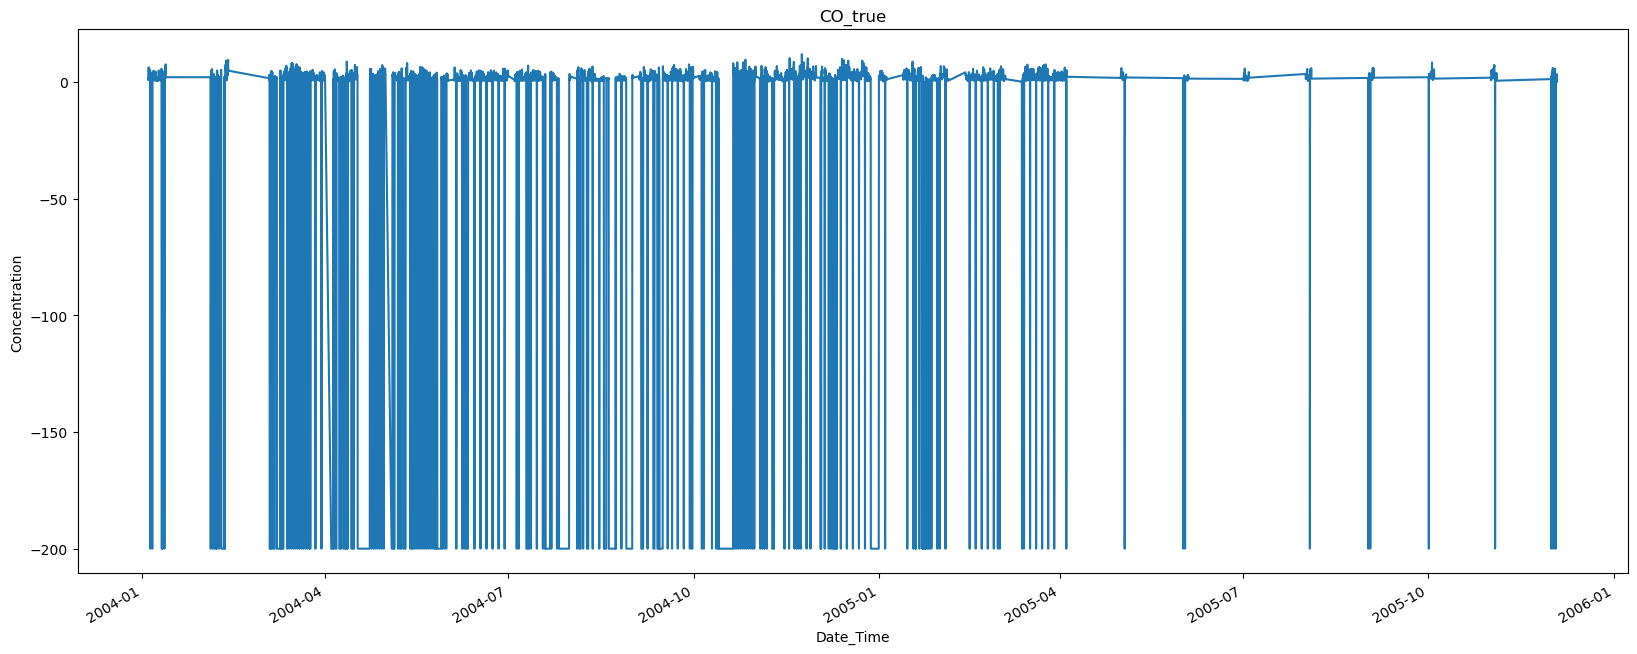

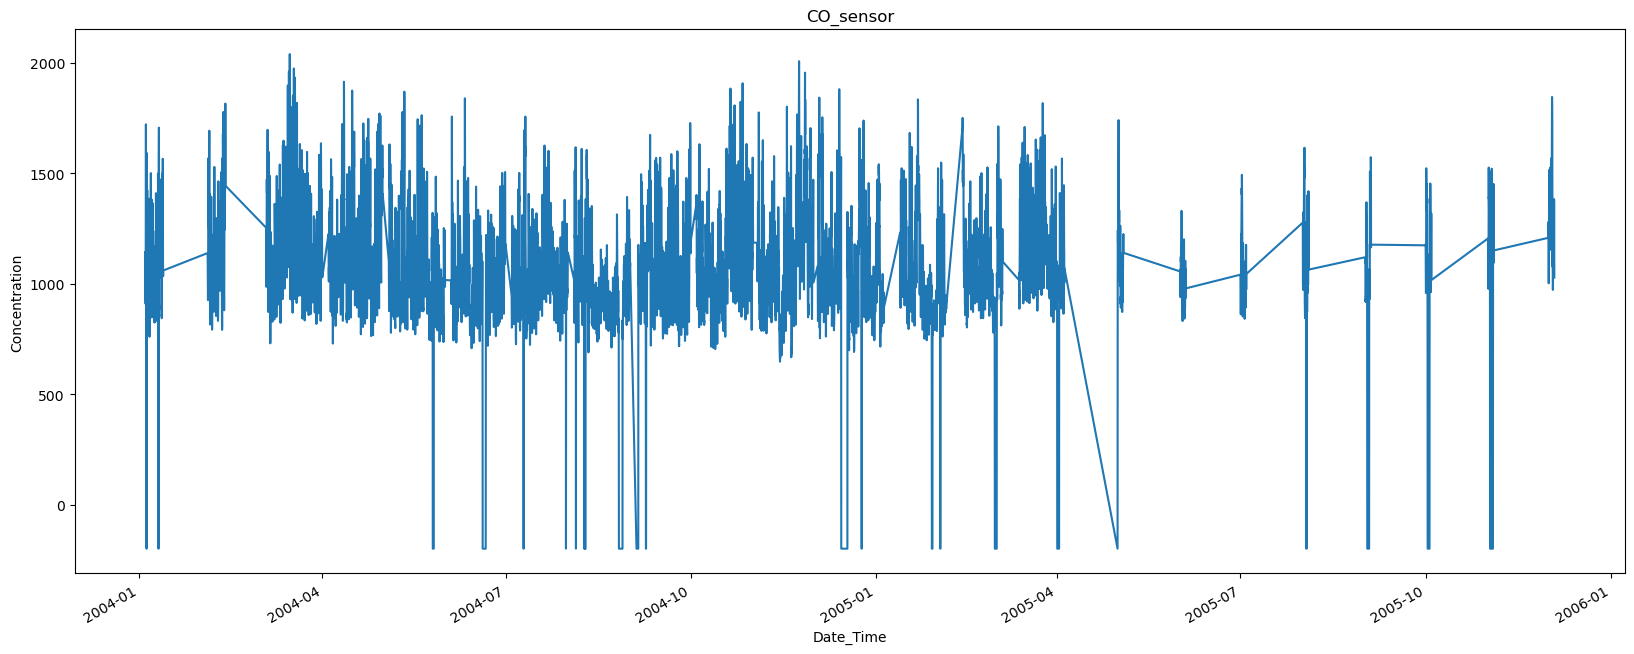

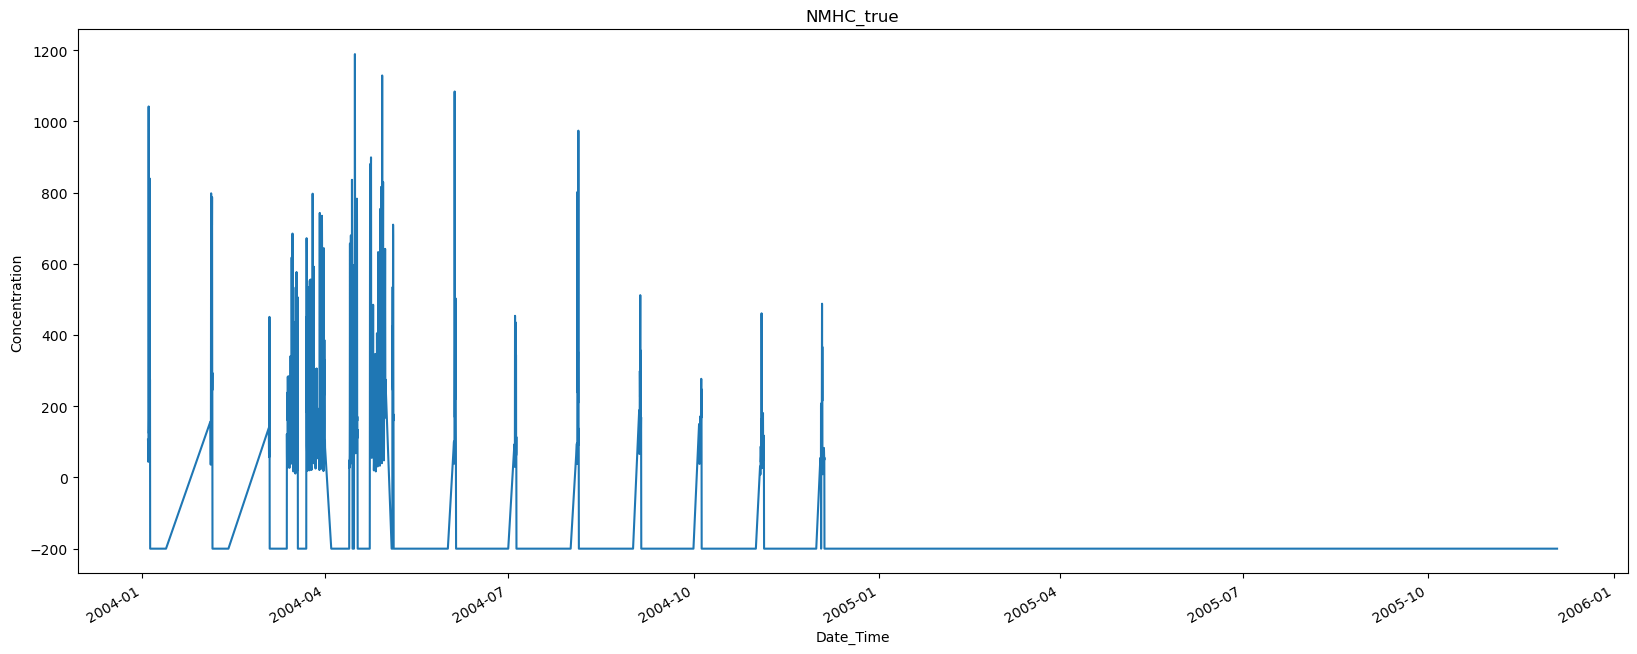

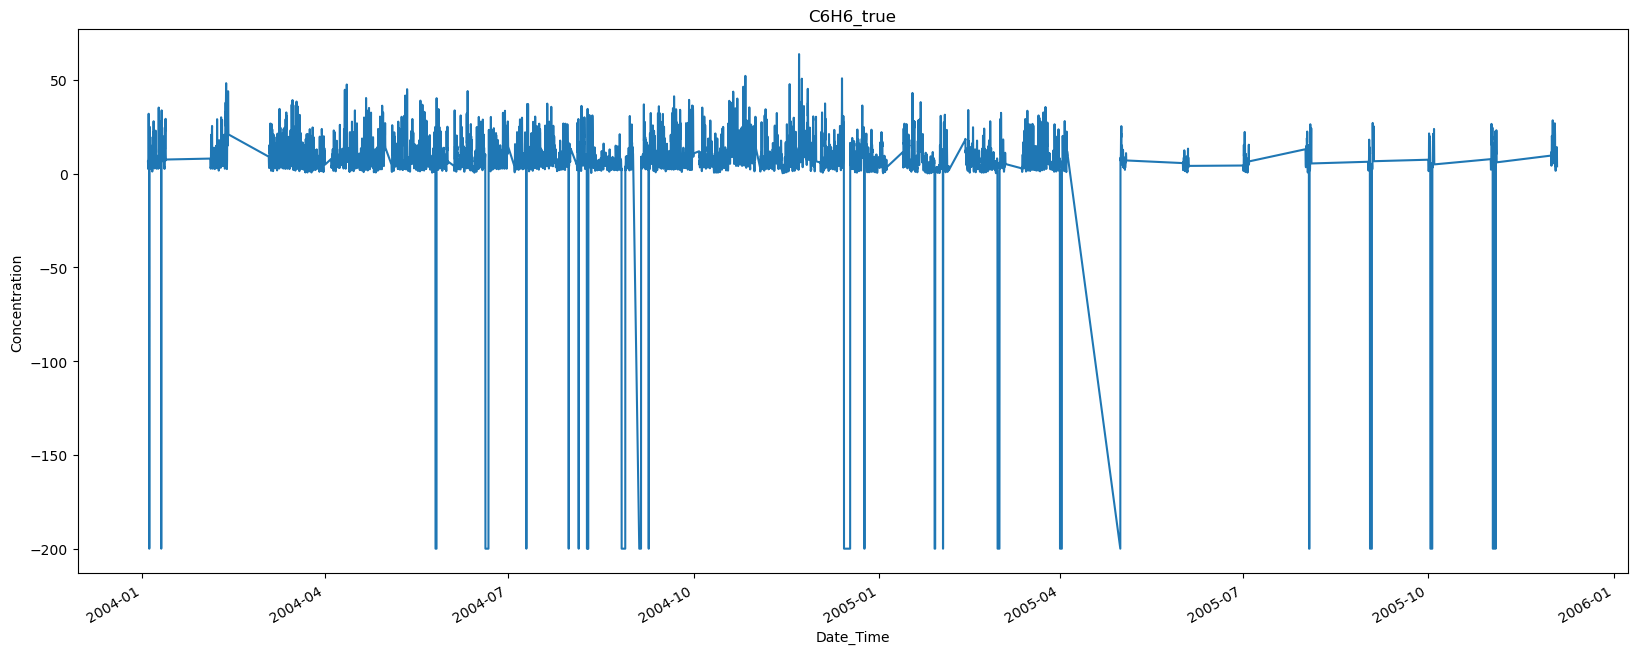

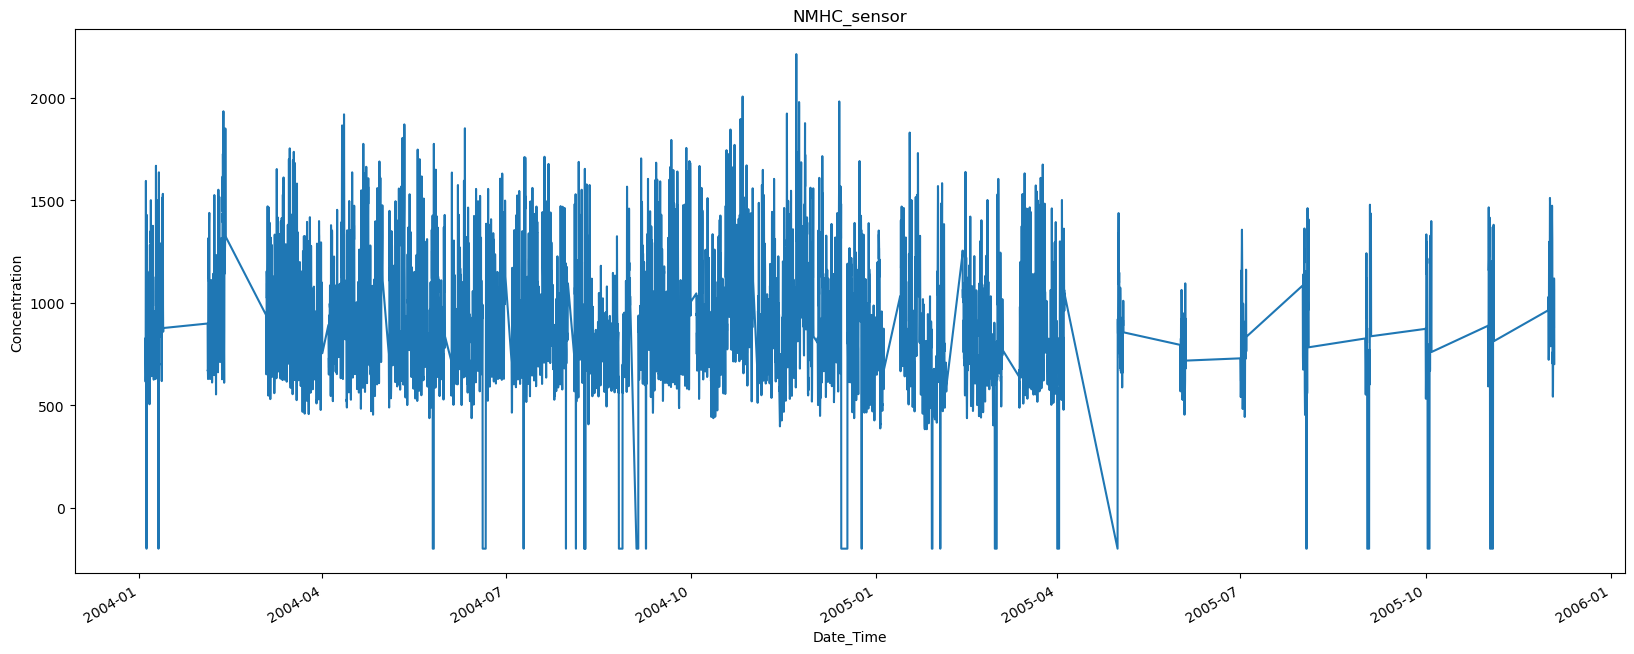

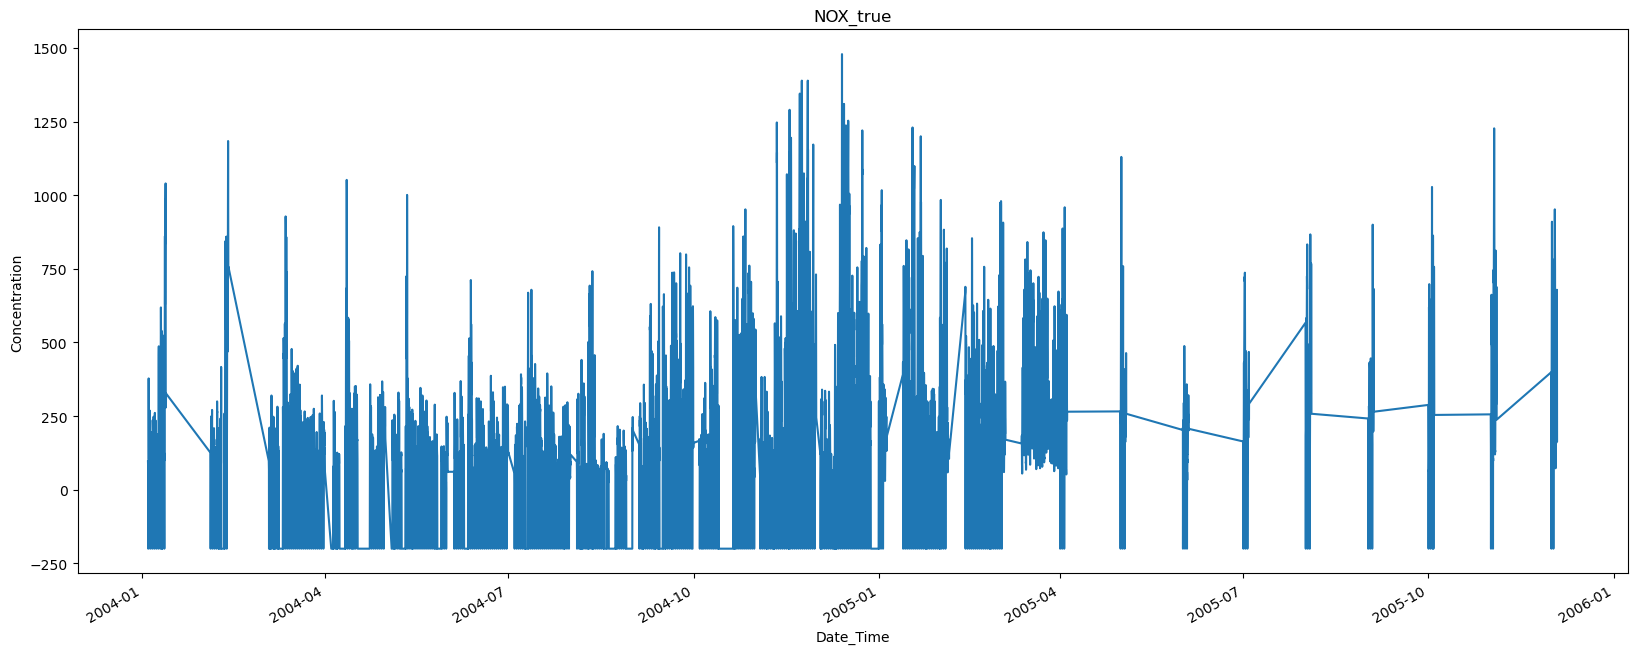

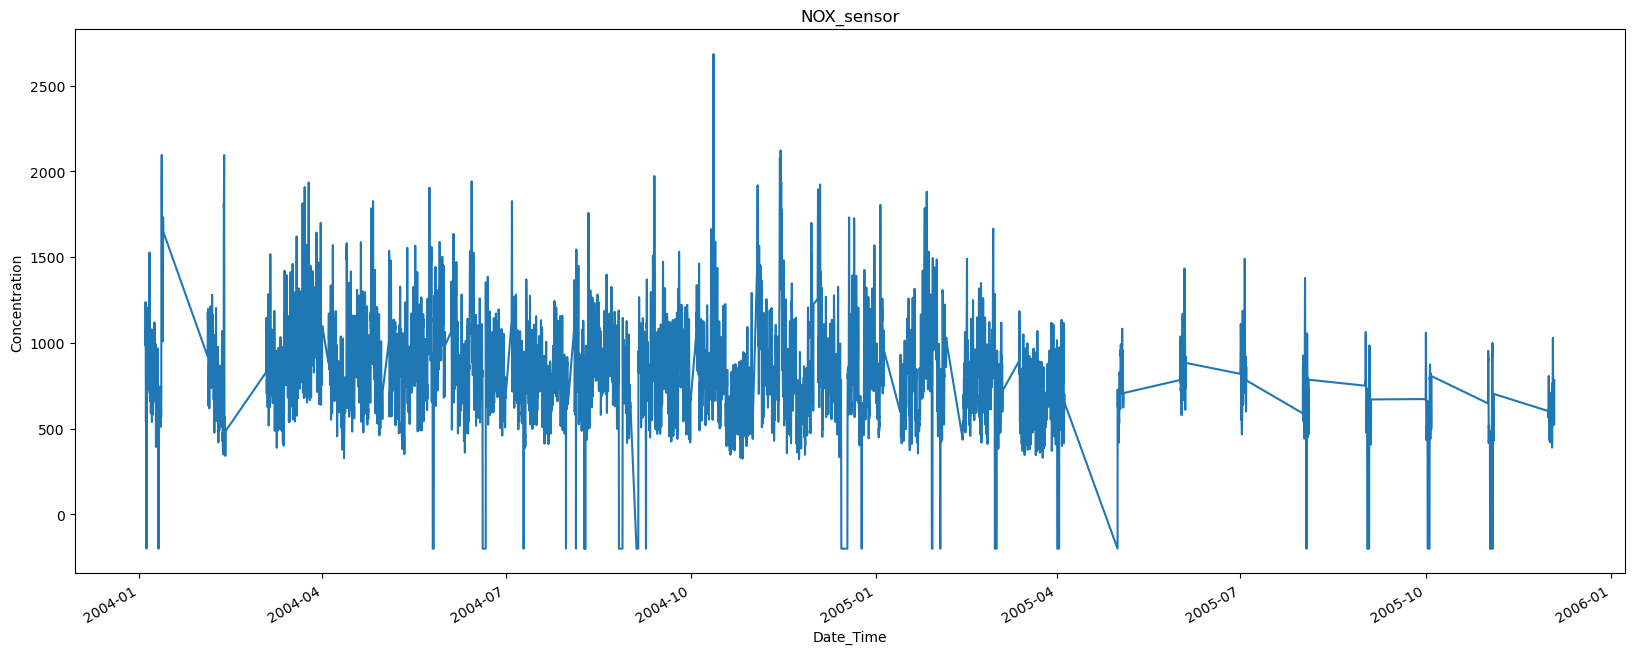

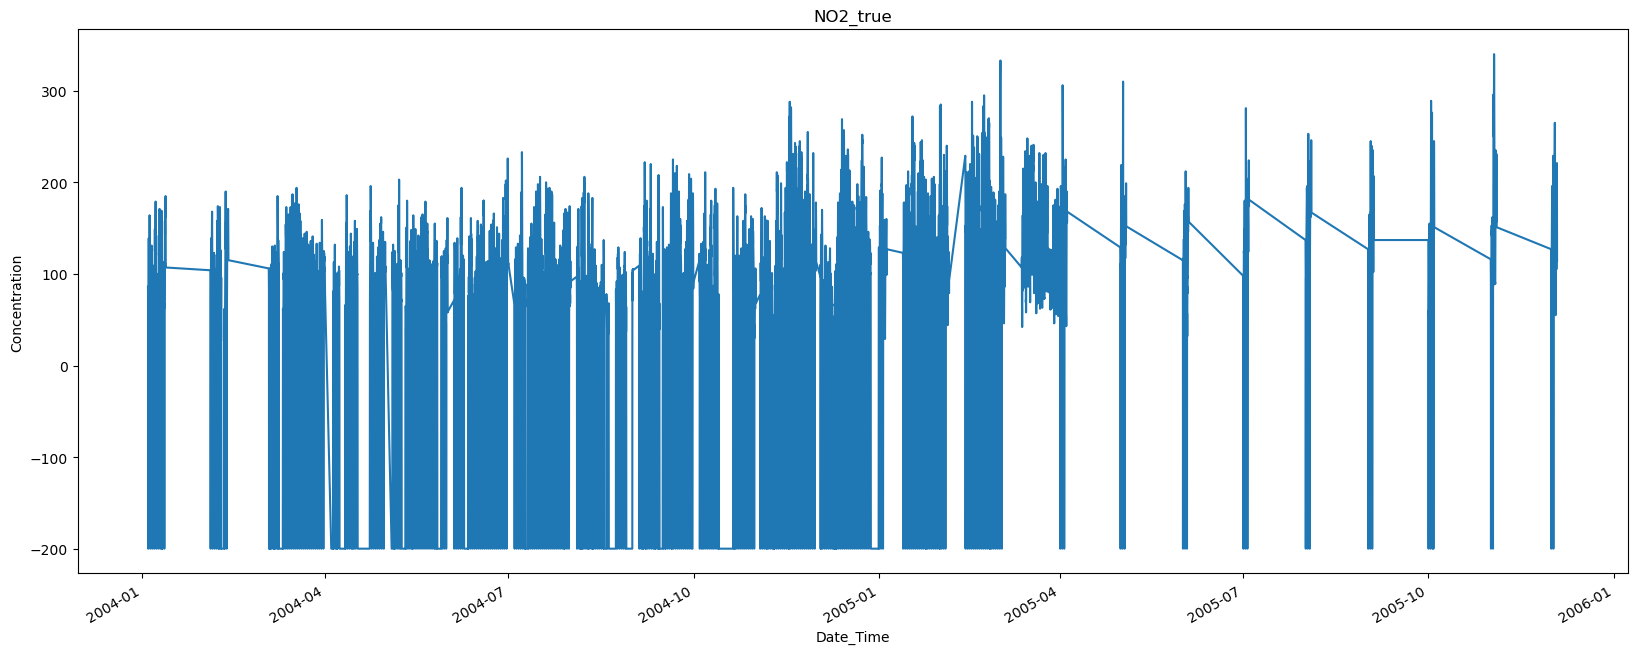

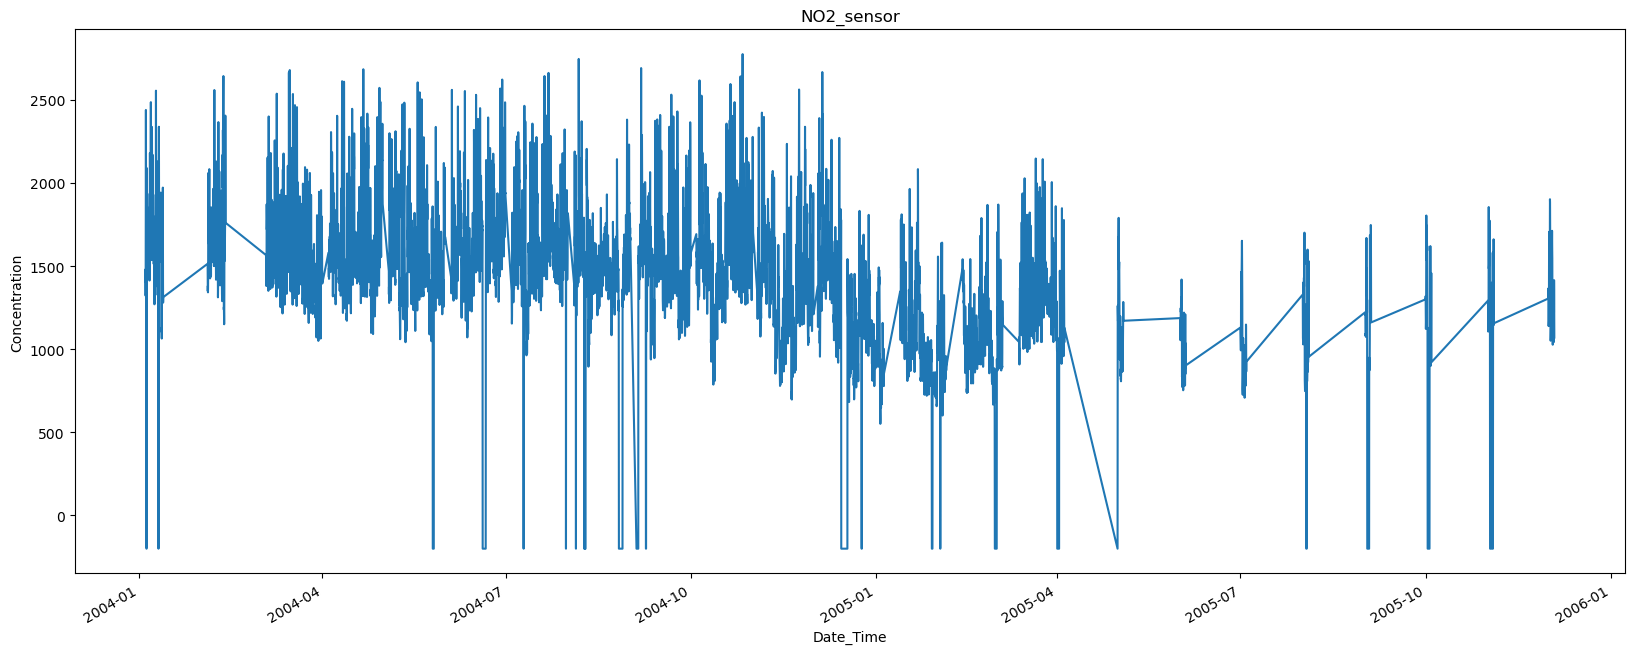

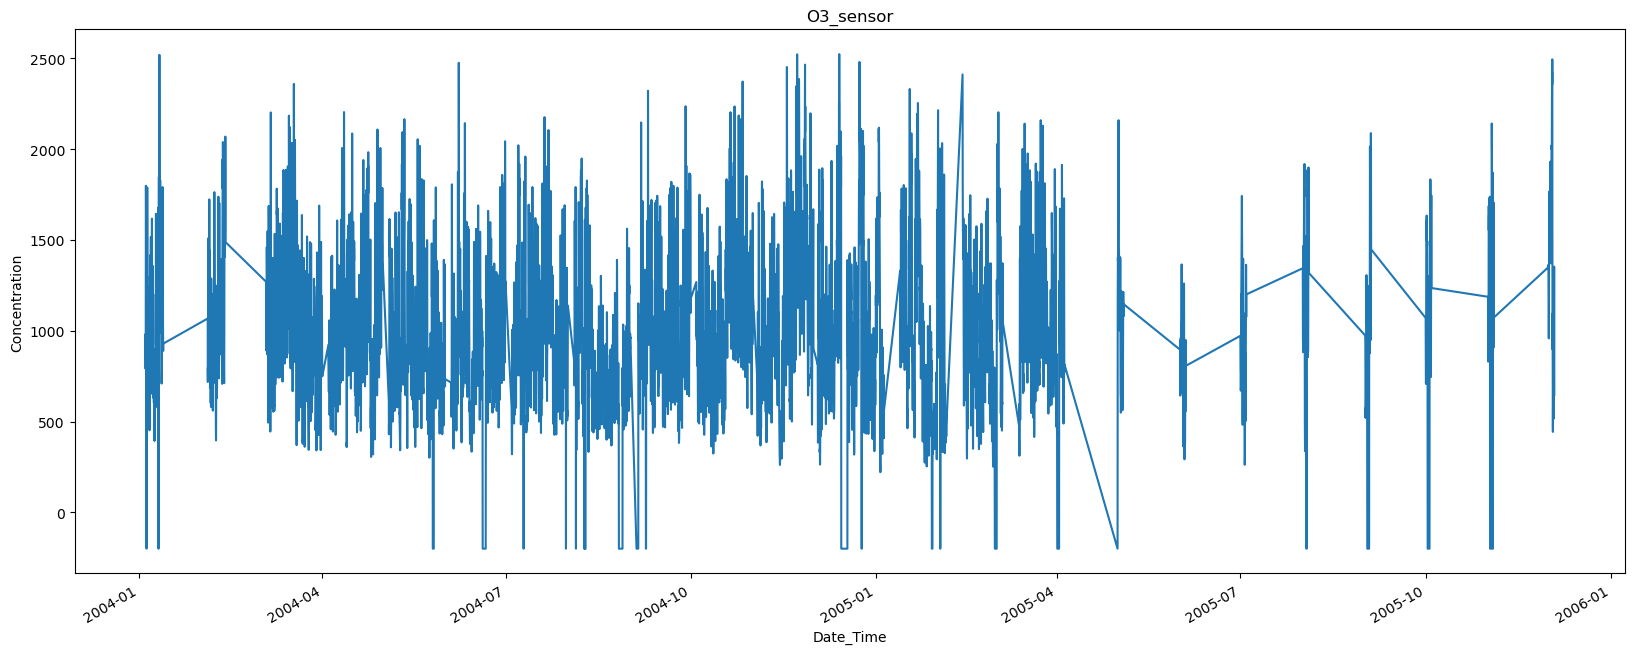

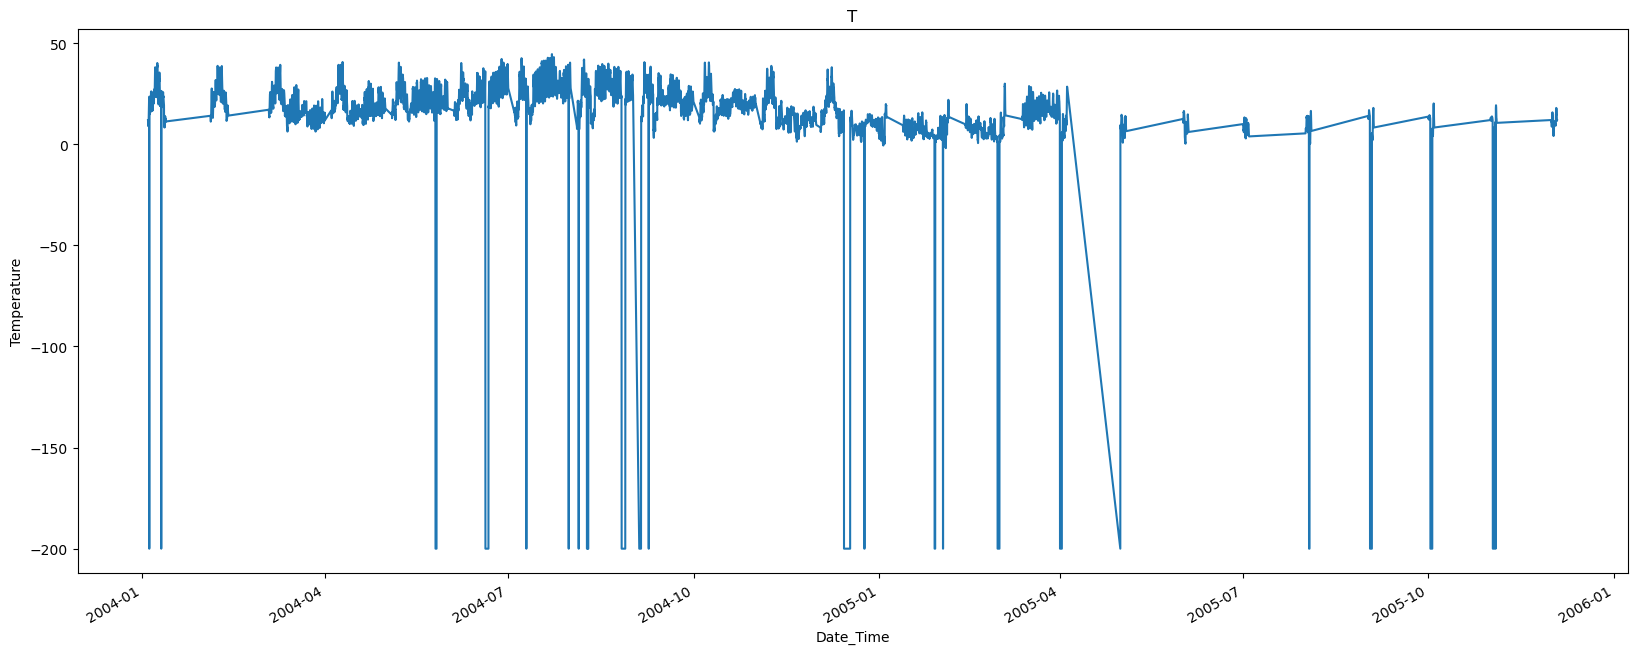

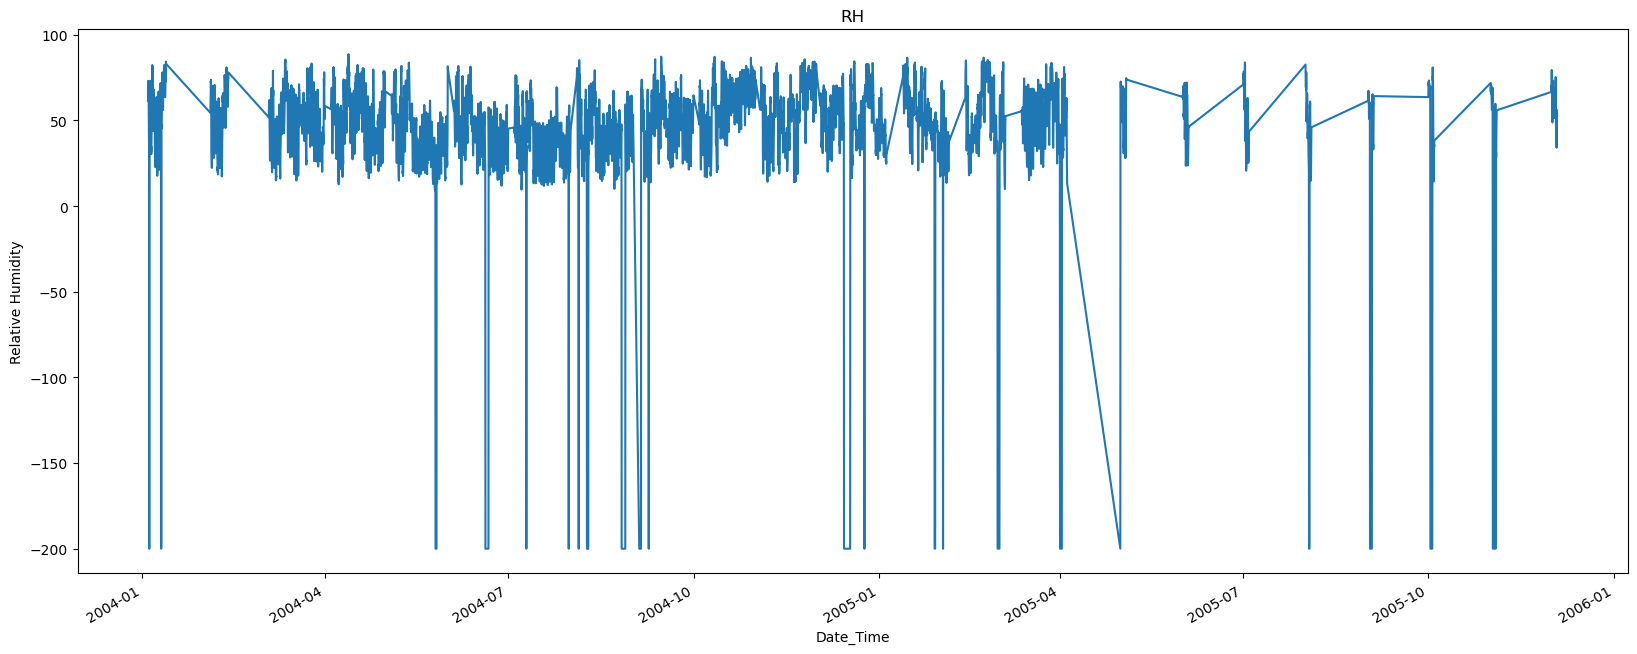

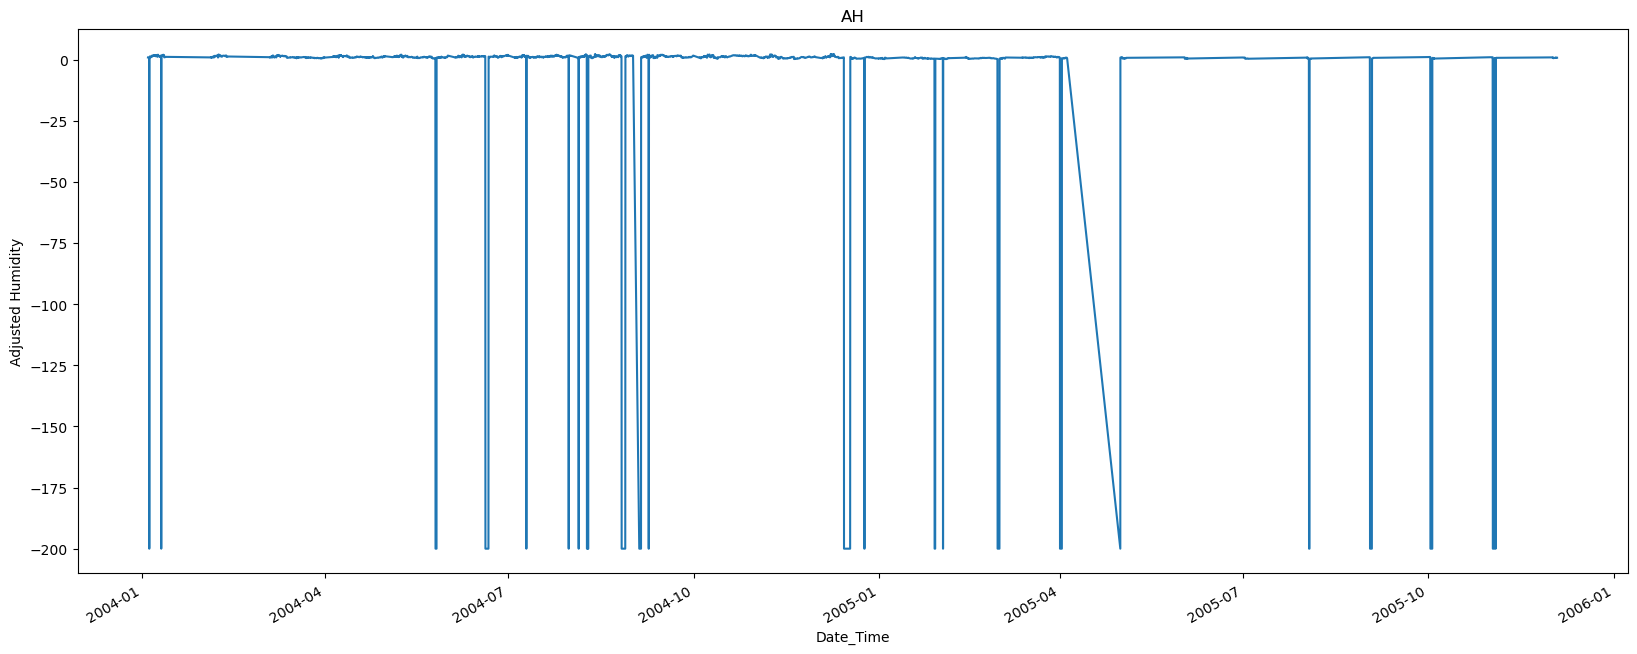

In [6]:
for var in data.columns:
    data[var].plot(figsize=(20,8))
    plt.title(var)
    ylabel=y_label.get(var)
    if ylabel:
        plt.ylabel(ylabel)
    else:
        plt.ylabel("Concentration")
    plt.show()

We will take the best quality data ie from 3/2004 to 4/2004
We will remove negative value to remove outliers.
we will resample the time stamp of each row to one hour

In [7]:
data = data["2004-04-01":"2005-04-30"]# reducing data

C:\Users\asus\AppData\Local\Temp\ipykernel_16480\1301644364.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data = data["2004-04-01":"2005-04-30"]# reducing data


In [8]:
data=data.asfreq("1H")

In [9]:
drop_vars = [var for var in data.columns if "_true" in var]
drop_vars.append("AH")
data.drop(labels=drop_vars,axis=1,inplace=True)

In [10]:
data[data<0]=np.NaN #changine  negative values with nan

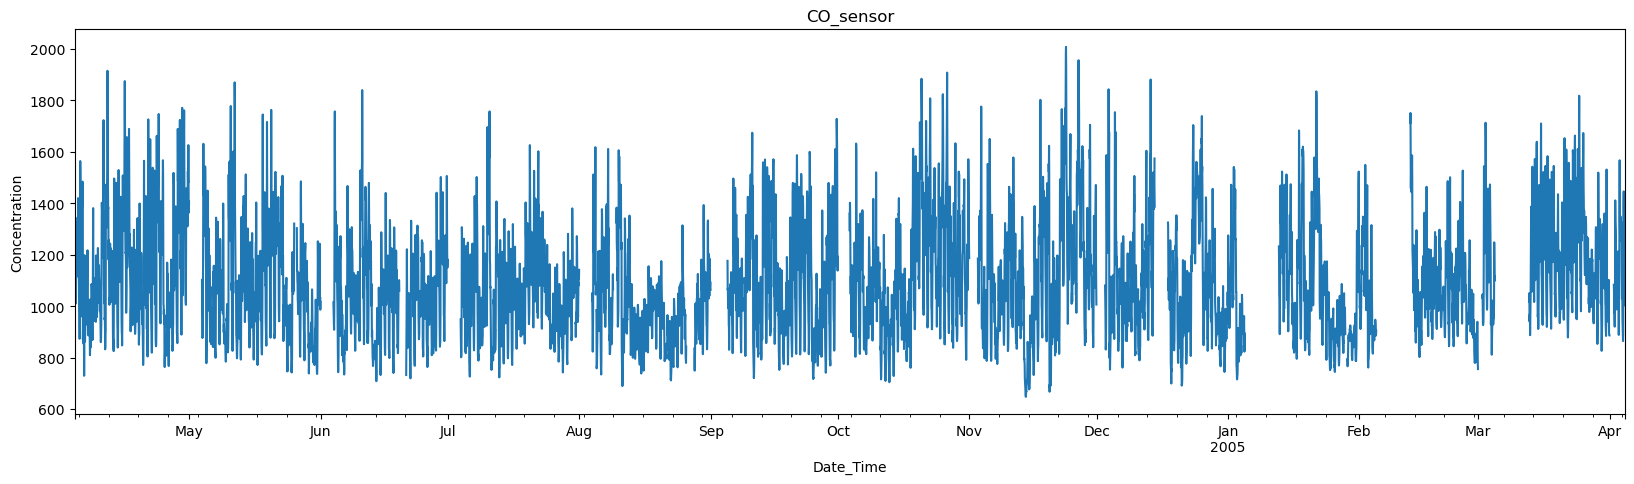

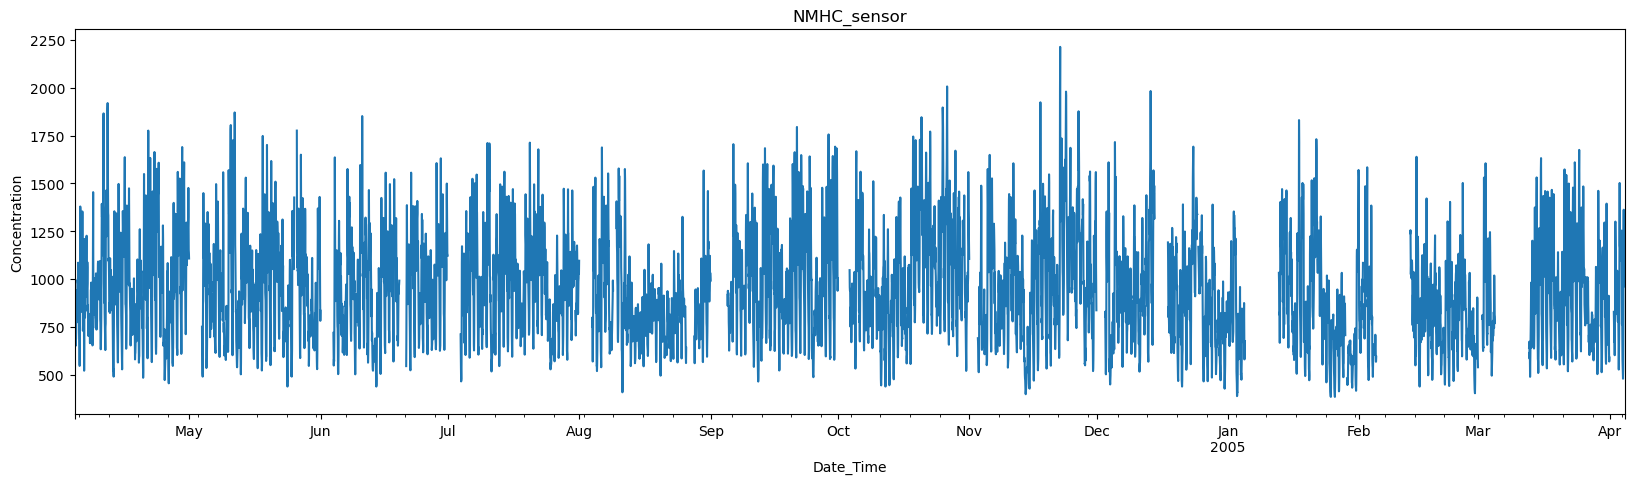

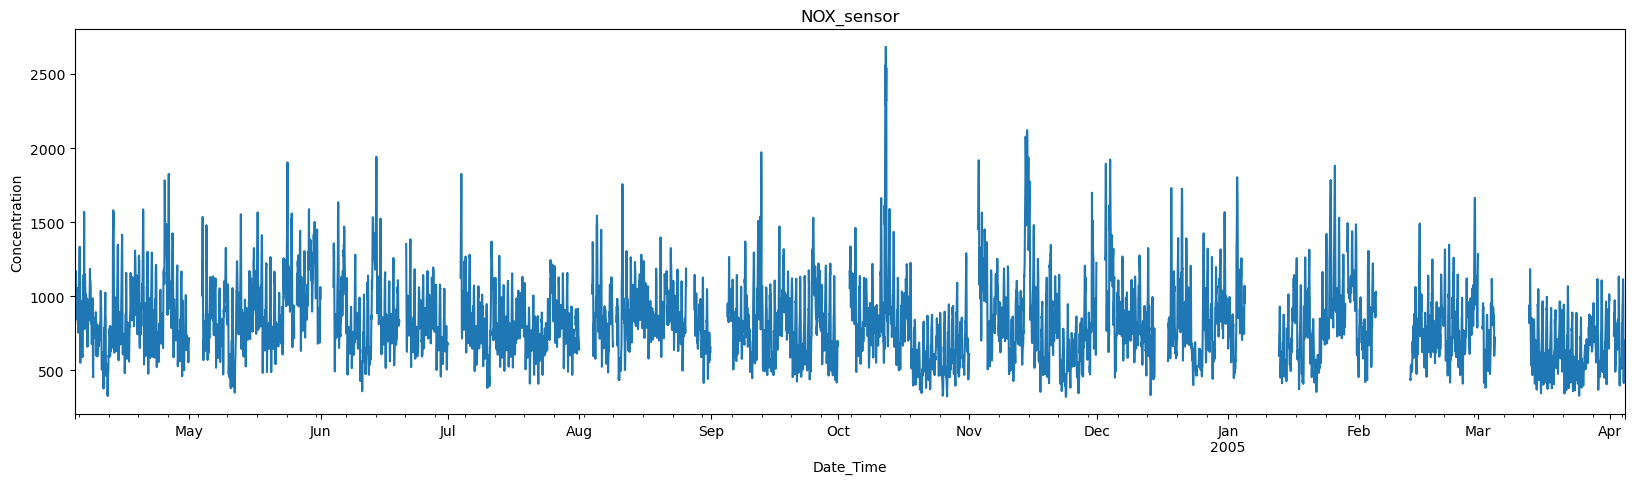

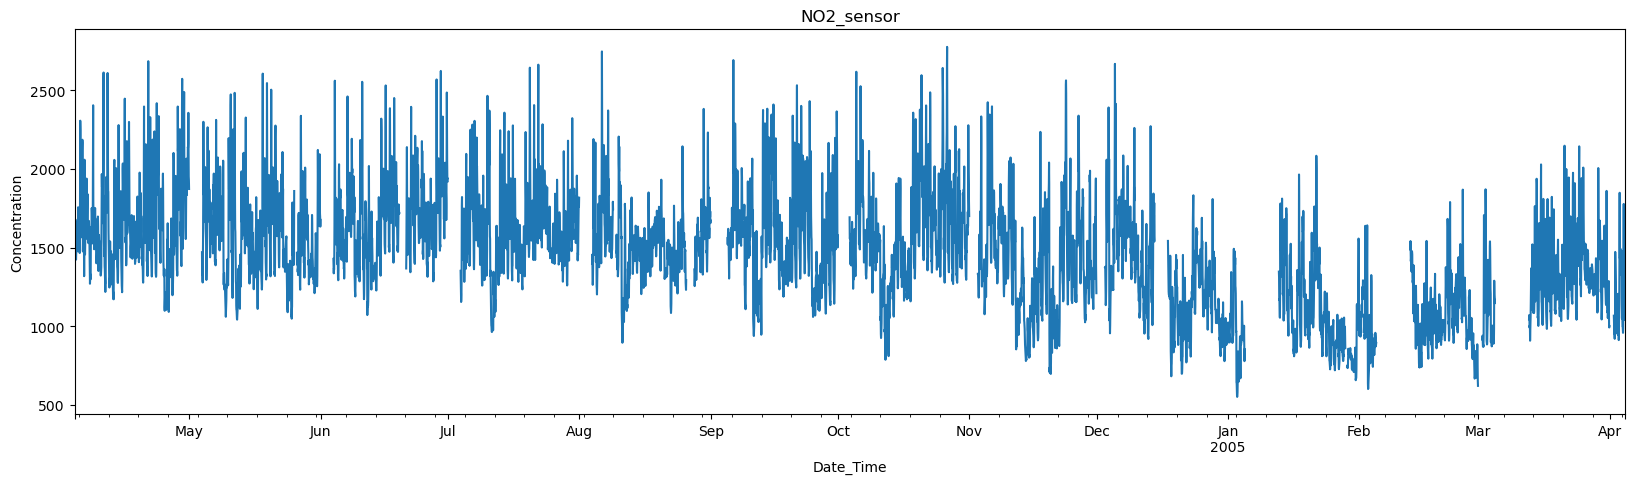

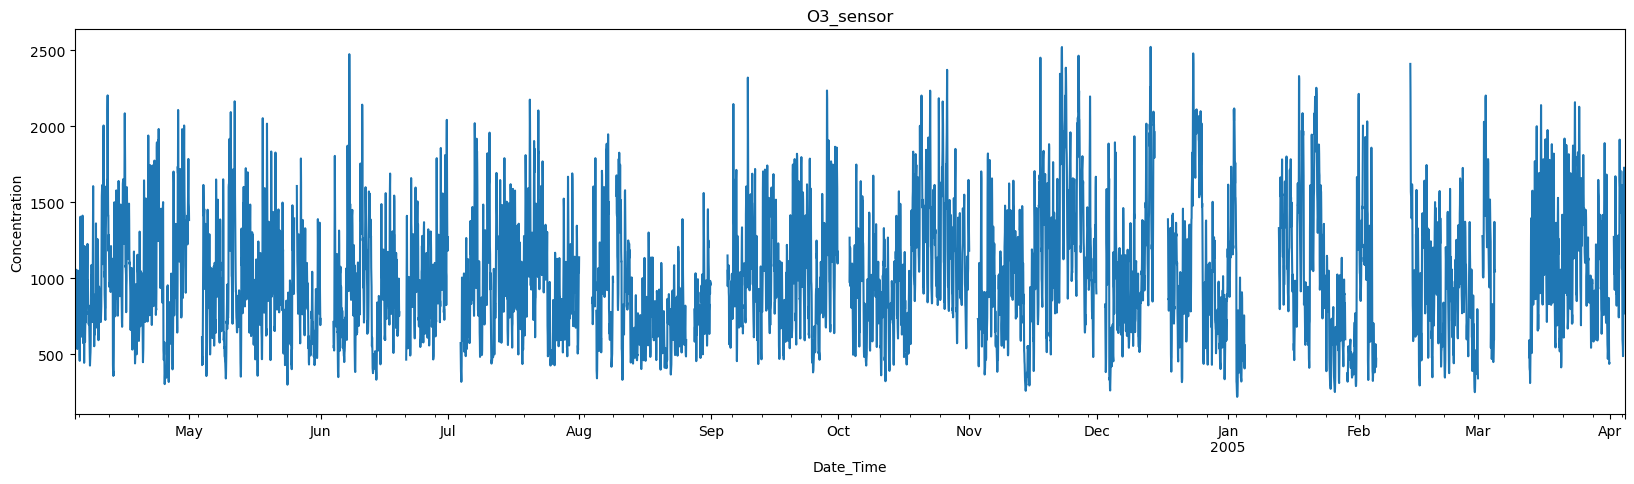

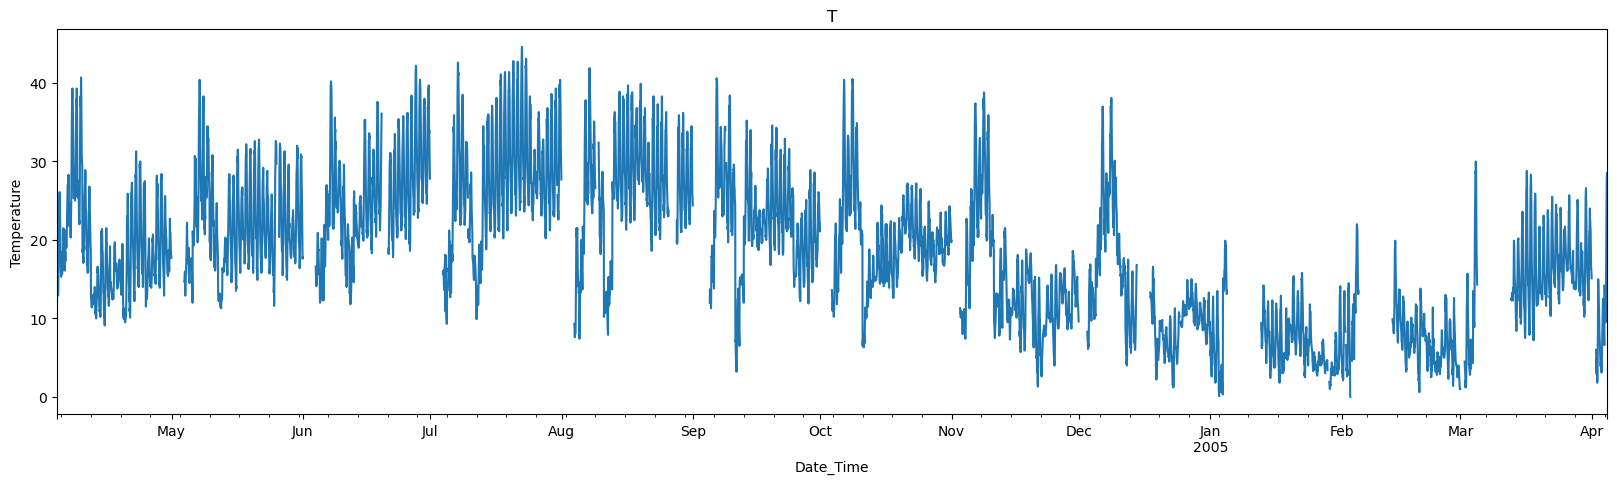

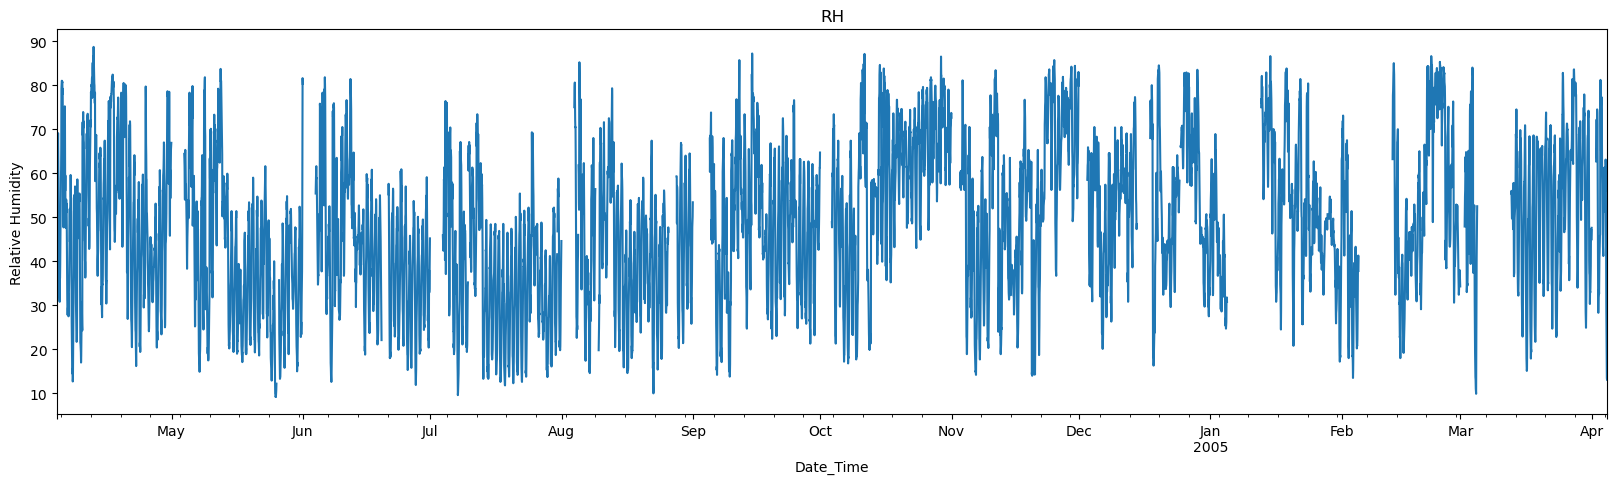

In [11]:
for var in data.columns:
    data[var].plot(figsize=(20,5))
    plt.title(var)
    ylabel=y_label.get(var)
    if ylabel:
        plt.ylabel(ylabel)
    else:
        plt.ylabel("Concentration")
    plt.show()

## Domain Knowladge
1.short term past (Rescent lags ie 1 ,2,3 hours)
2.Daily patterns (24 hours)
3.Weekend patterns
4.Yearly Patterns

In [12]:
#lets check all of these

In [13]:
#extracting the time series components
data["date"]=data.index.date
data["Time_of_Day"]=data.index.hour
data["month"]=data.index.month
data["day_of_week"]=data.index.dayofweek
data["week_of_year"]=data.index.isocalendar().week

In [14]:
y_label={
    "T":"Temperature",
    "RH":"Relative Humidity",
    "AH":"Adjusted Humidity"
}

# Seasonality Daily


Text(0, 0.5, 'Temperature')

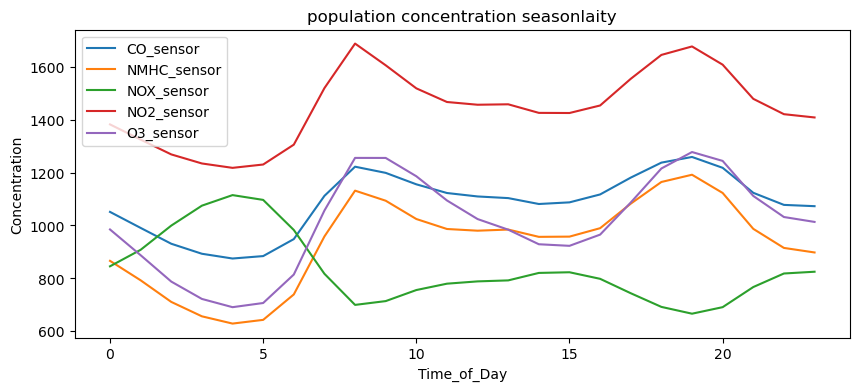

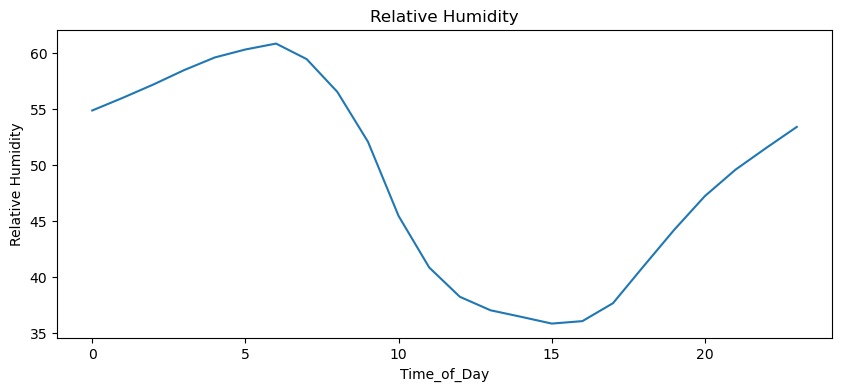

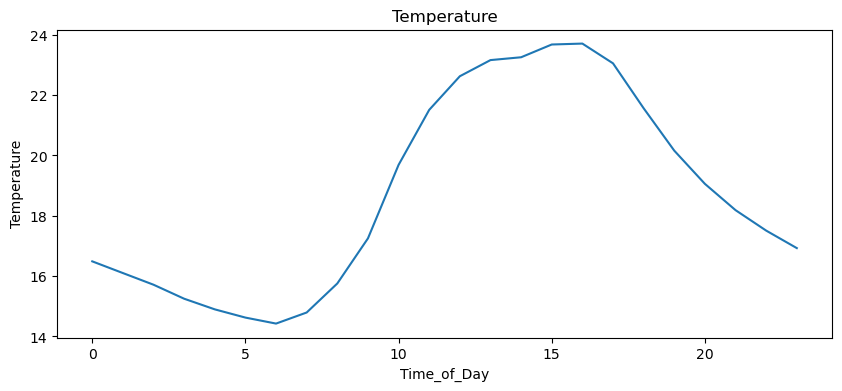

In [15]:
sensor_col=[col for col in data.columns if "sensor" in col]
fig,ax=plt.subplots(figsize=(10,4))
data.groupby("Time_of_Day")[sensor_col].mean().plot(ax=ax)
plt.title("population concentration seasonlaity")
plt.ylabel("Concentration")

fig,ax=plt.subplots(figsize=(10,4))
data.groupby("Time_of_Day")["RH"].mean().plot(ax=ax)
plt.title("Relative Humidity")
plt.ylabel("Relative Humidity")

fig,ax=plt.subplots(figsize=(10,4))
data.groupby("Time_of_Day")["T"].mean().plot(ax=ax)
plt.title("Temperature")
plt.ylabel("Temperature")



Daily patter can shift many time a year so lets plot full data sets

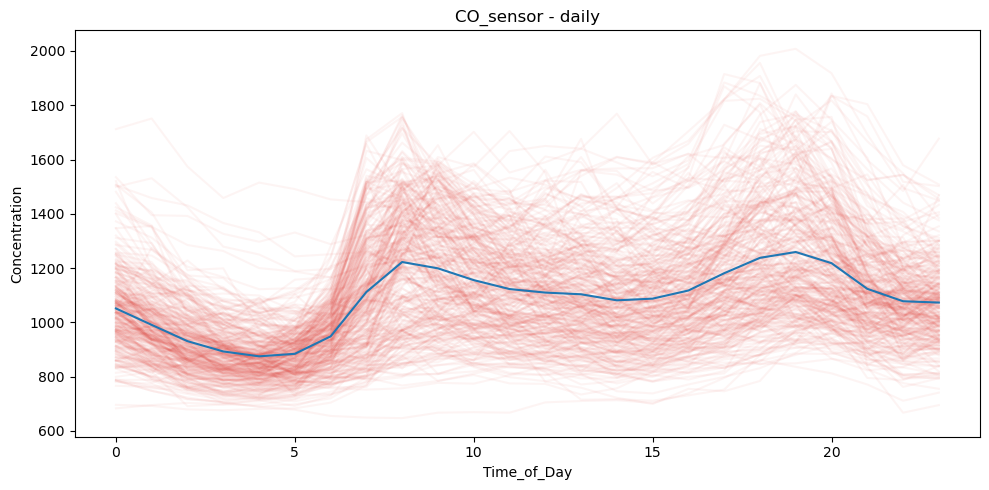

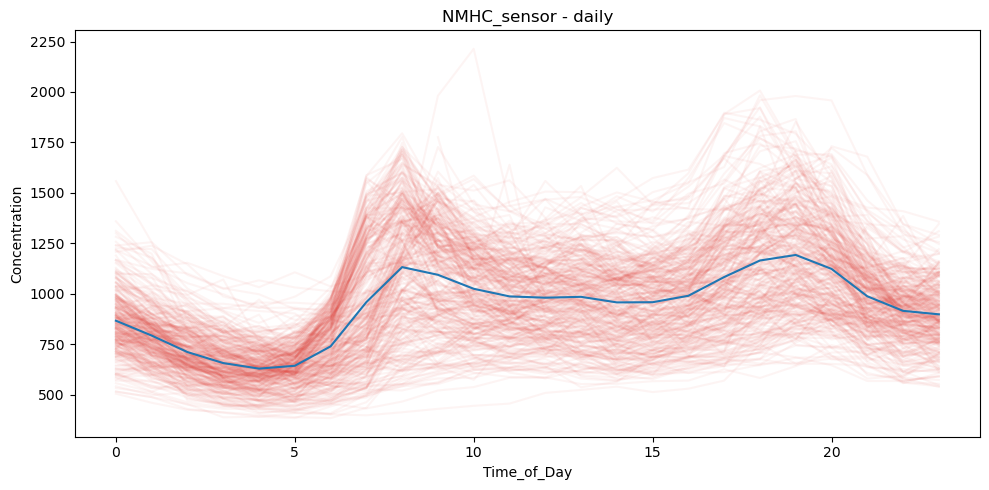

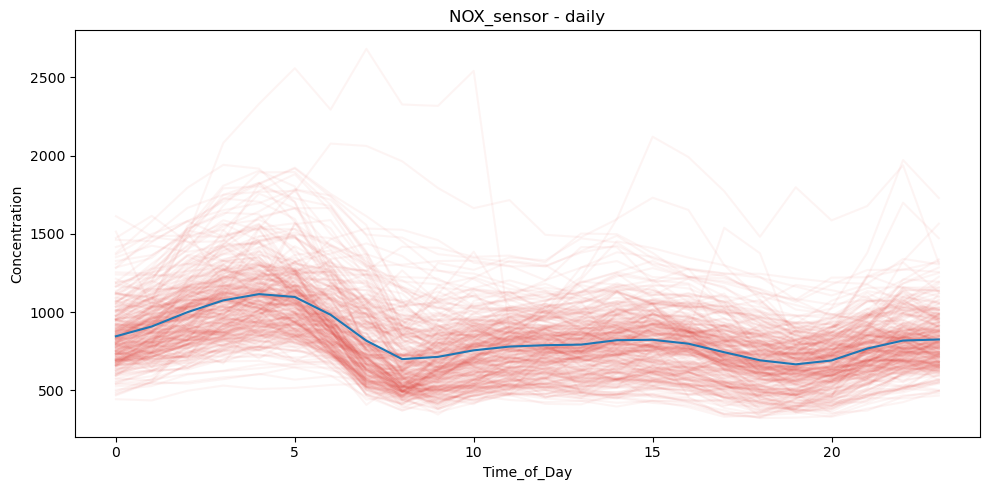

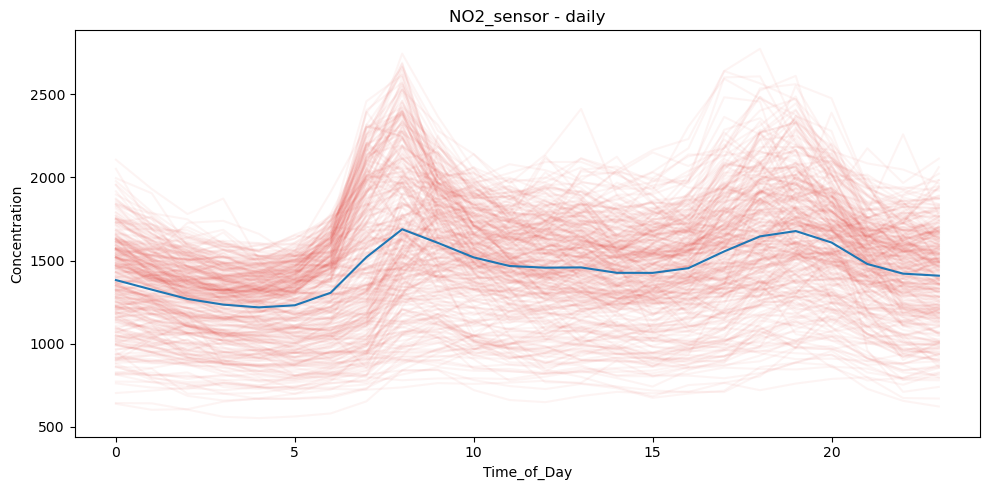

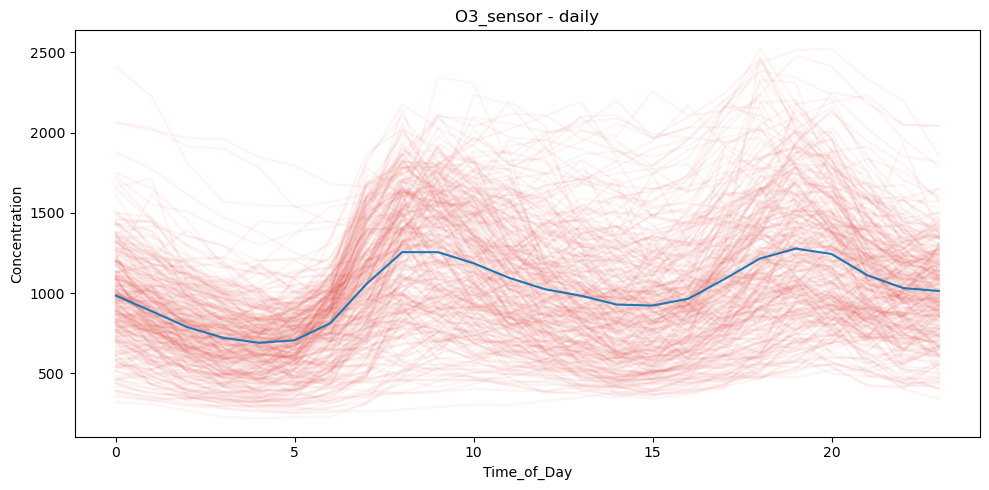

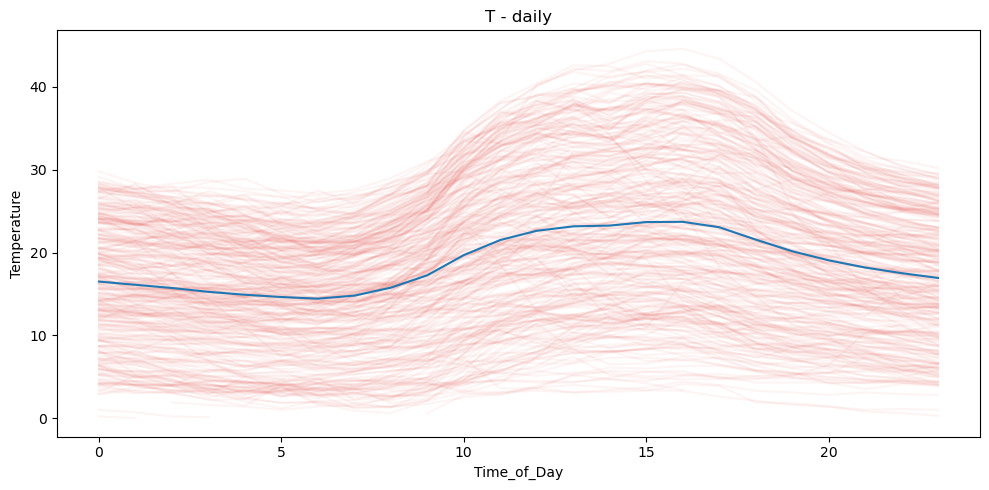

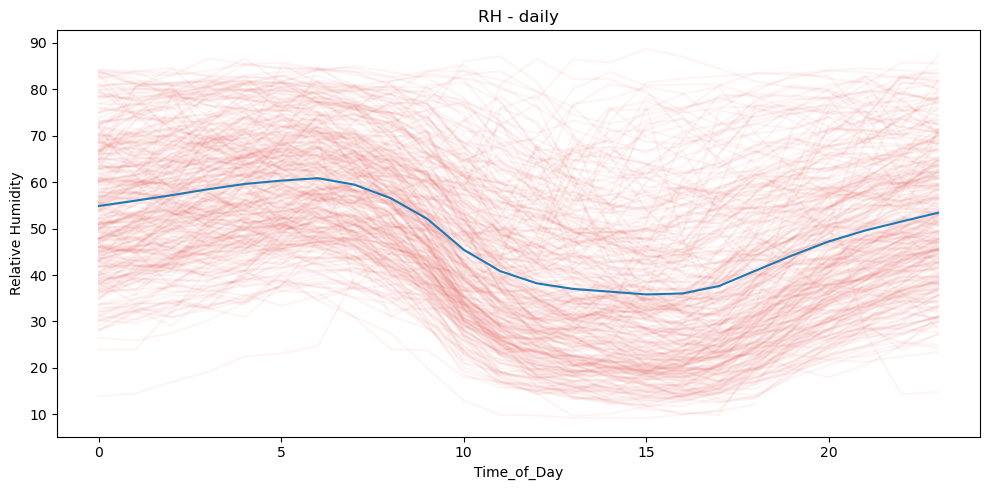

In [16]:
variables = [
    "CO_sensor",
    "NMHC_sensor",
    "NOX_sensor",
    "NO2_sensor",
    "O3_sensor",
    "T",
    "RH",
]
cmap = sns.color_palette("Reds", n_colors=5)
for var in variables:
    fig,ax=plt.subplots(figsize=[10,5])
    (
        data.pivot(index=["Time_of_Day"],columns=["date"])[var].plot
        (legend=False,alpha=0.05,color=cmap[3], ax=ax)
    )
    (data.groupby("Time_of_Day").mean(numeric_only=True)[var].plot(ax=ax))

    ax.set_title(f"{var} - daily")

    ylabel = y_label.get(var)
    if ylabel:
        plt.ylabel(ylabel)
    else:
        plt.ylabel("Concentration")

    plt.tight_layout()

## weekly seasonality

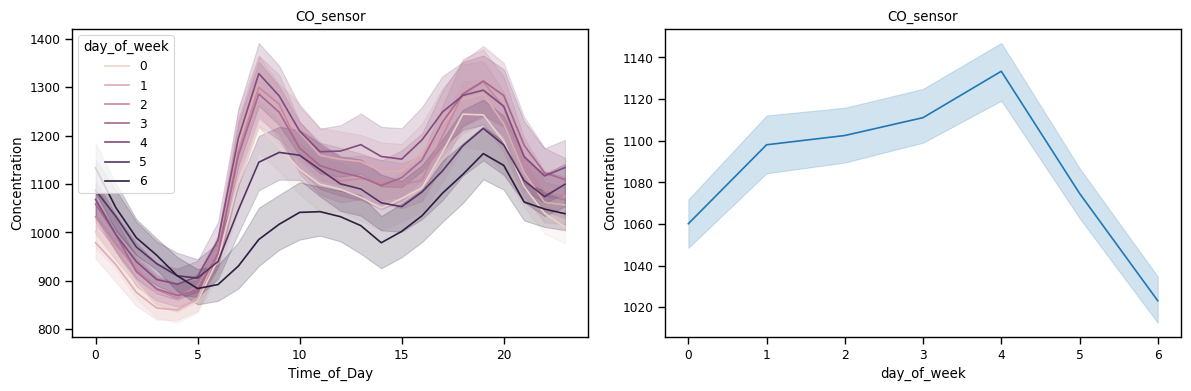

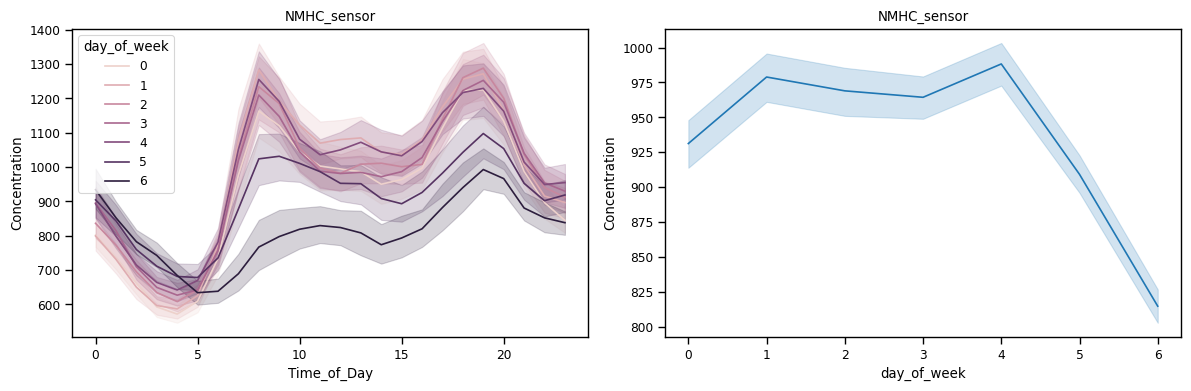

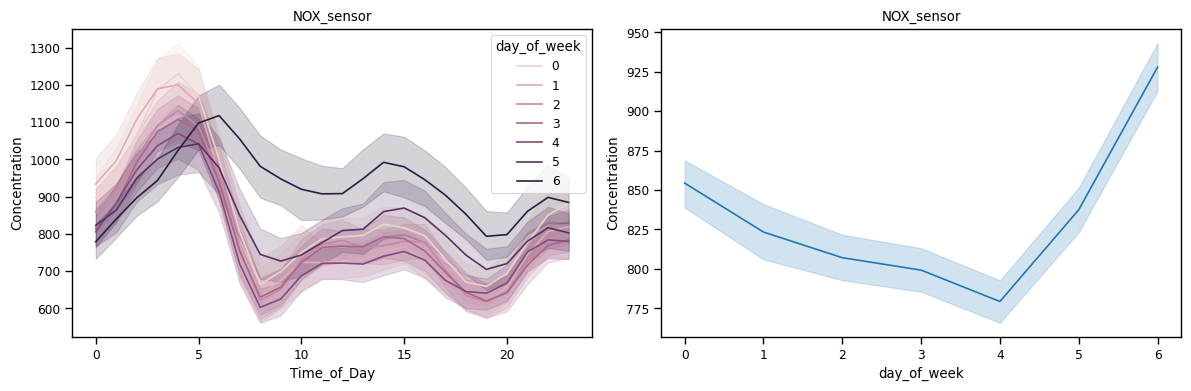

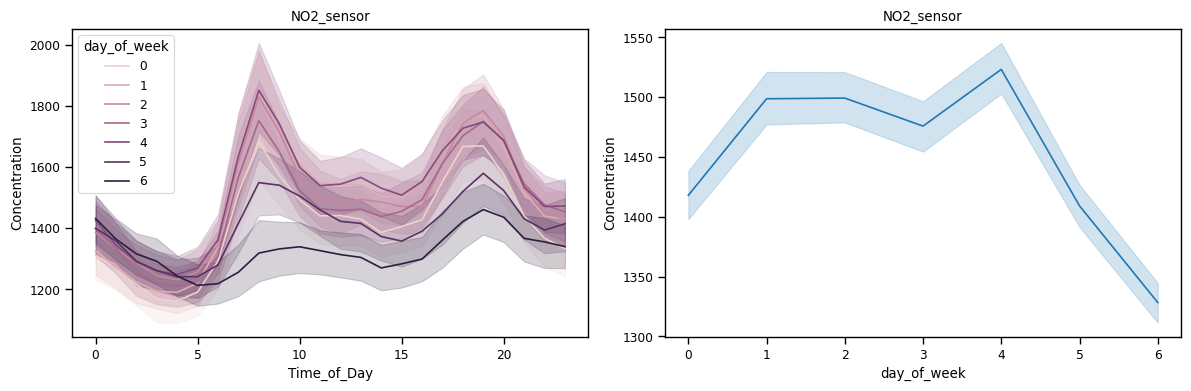

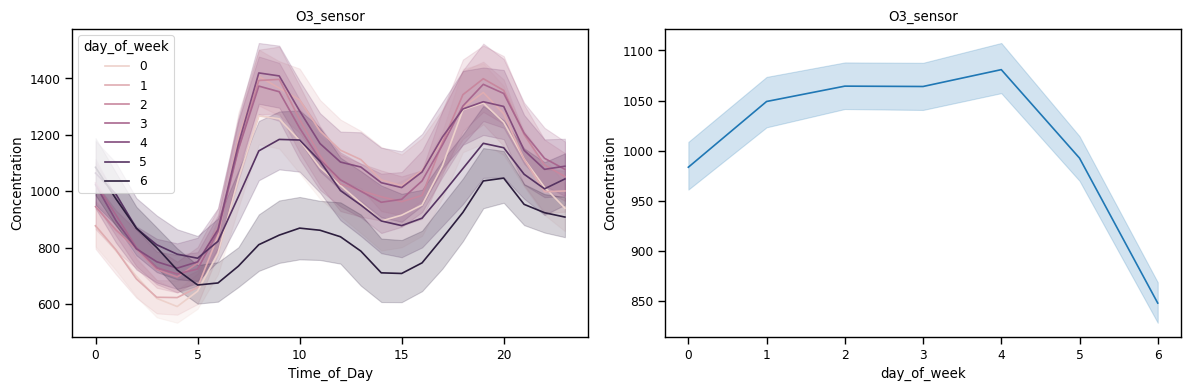

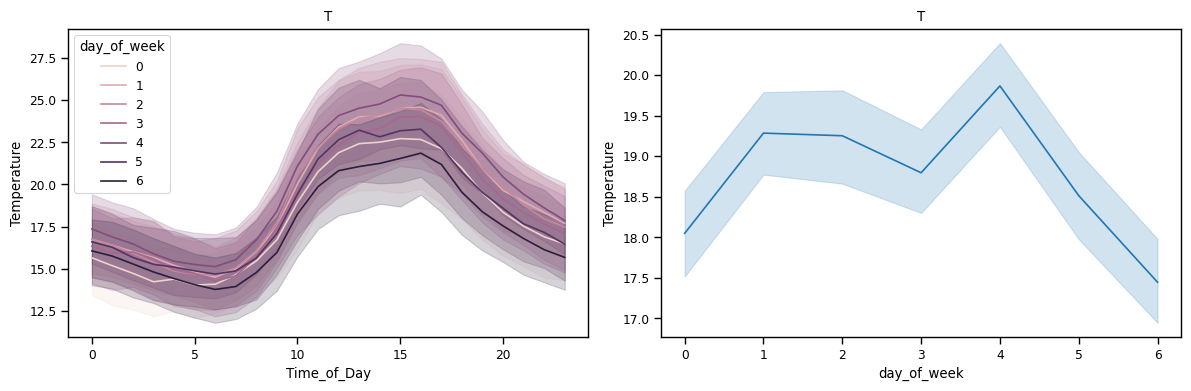

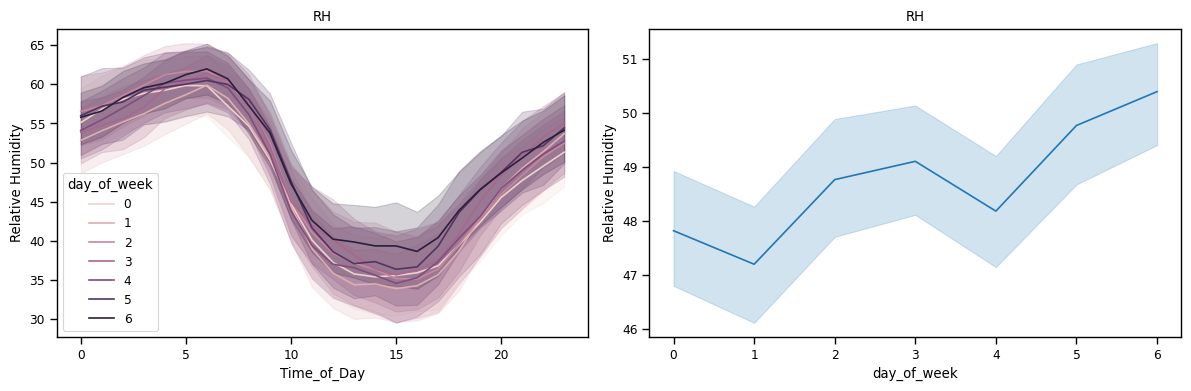

In [17]:
pd.plotting.register_matplotlib_converters()
with sns.plotting_context("paper"):
    for var in variables:
        fig,ax=plt.subplots(ncols=2,figsize=[12,4])
        ylabel=y_label.get(var)
        sns.lineplot(data=data,y=var,x="Time_of_Day",hue="day_of_week",ax=ax[0])
        if ylabel:
            ax[0].set_ylabel(ylabel)
        else:
            ax[0].set_ylabel("Concentration")
        ax[0].set_title(var)
        
        sns.lineplot(data=data,y=var,x="day_of_week",ax=ax[1])
        if ylabel:
            ax[1].set_ylabel(ylabel)
        else:
            ax[1].set_ylabel("Concentration")
        ax[1].set_title(var)
        
        plt.tight_layout()
    

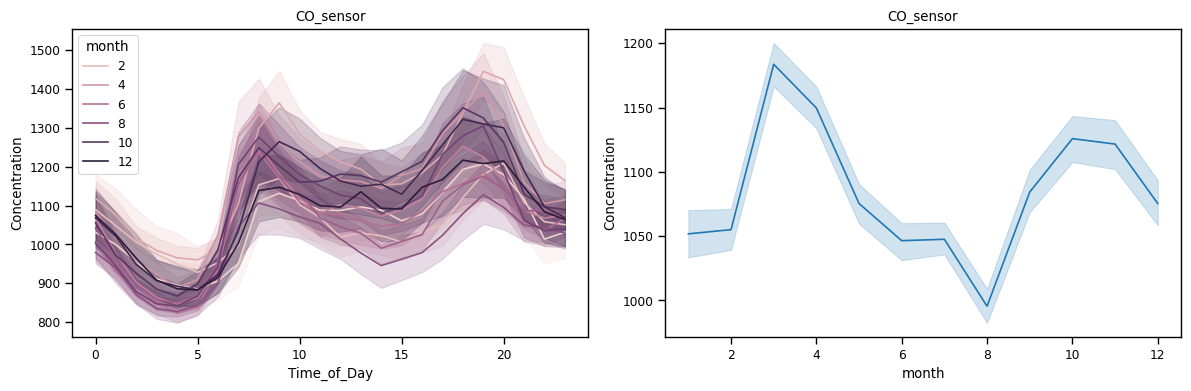

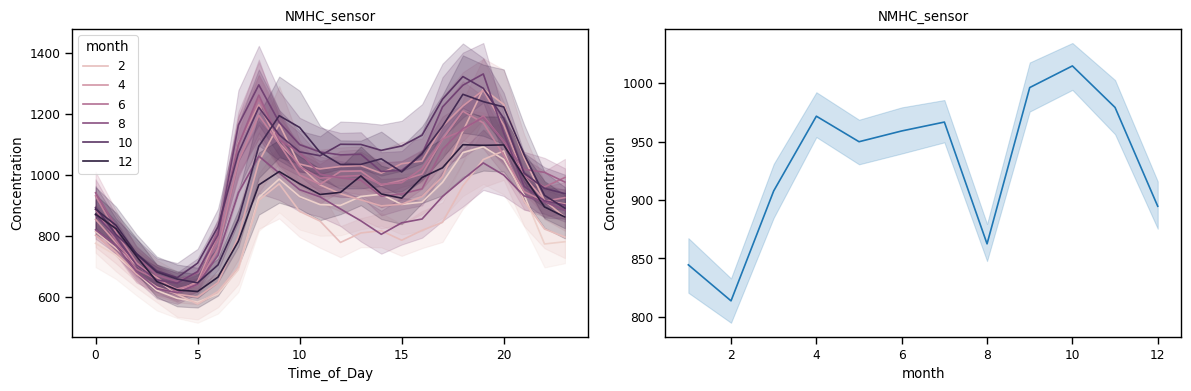

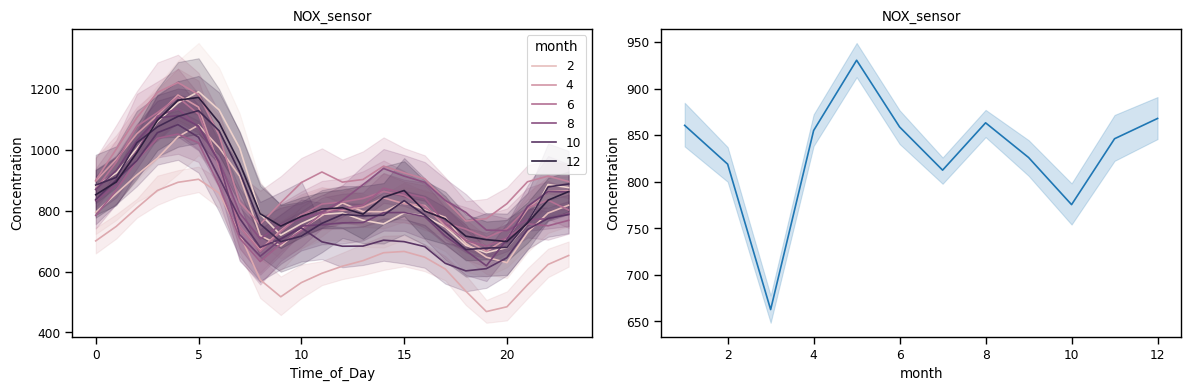

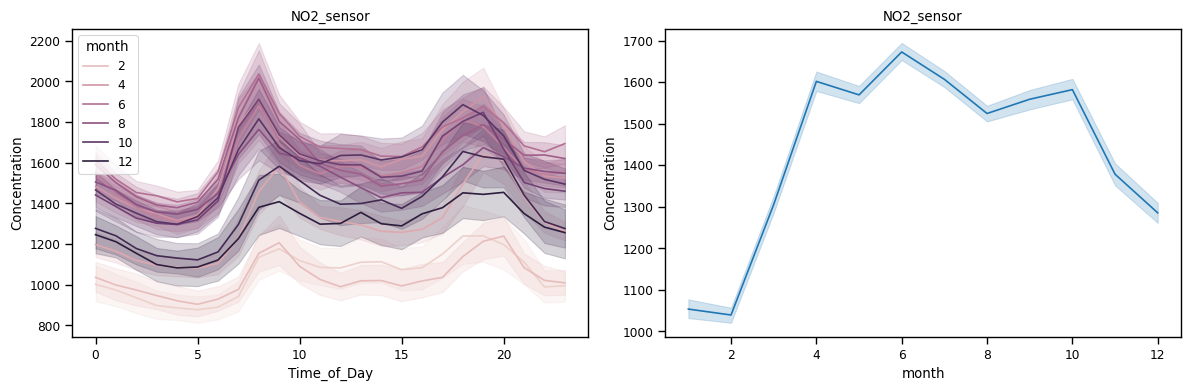

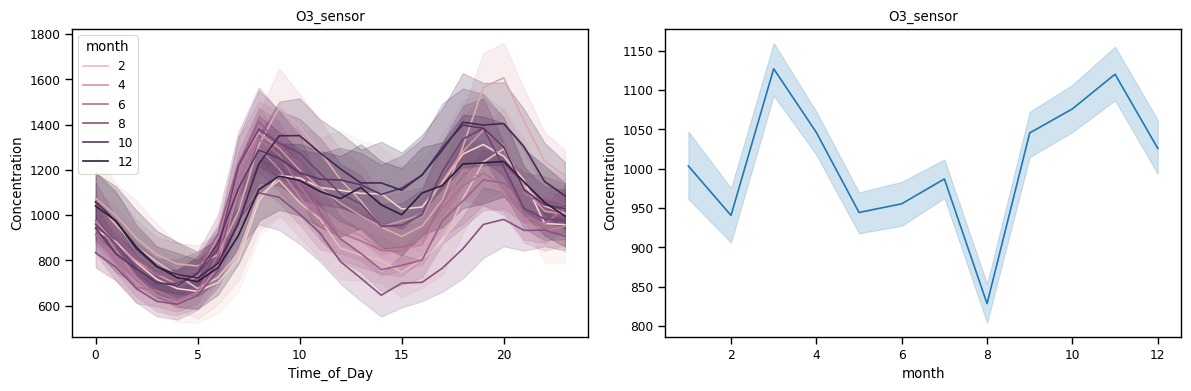

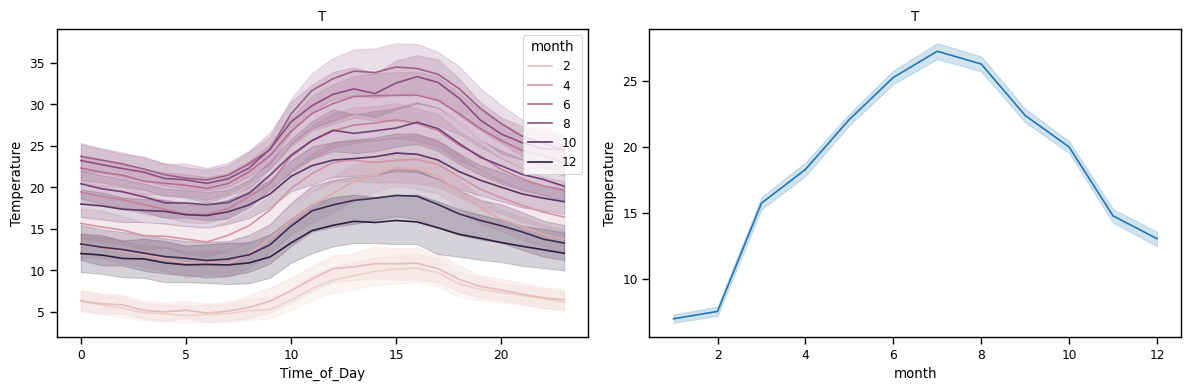

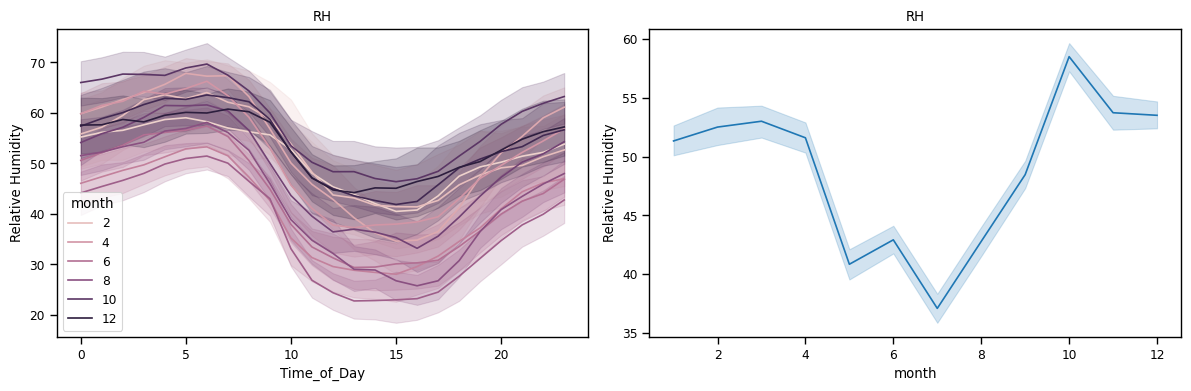

In [20]:
with sns.plotting_context("paper"):
    for var in variables:
        fig,ax=plt.subplots(ncols=2,figsize=[12,4])
        ylabel=y_label.get(var)
        sns.lineplot(data=data,y=var,x="Time_of_Day",hue="month",ax=ax[0])
        if ylabel:
            ax[0].set_ylabel(ylabel)
        else:
            ax[0].set_ylabel("Concentration")
        ax[0].set_title(var)
        
        sns.lineplot(data=data,y=var,x="month",ax=ax[1])
        if ylabel:
            ax[1].set_ylabel(ylabel)
        else:
            ax[1].set_ylabel("Concentration")
        ax[1].set_title(var)
        
        plt.tight_layout()
    

In [21]:
data.to_csv('AirQualityUCI_eda.csv', index=False)

### Feature selection 

In [22]:
from feature_engine.timeseries.forecasting import LagFeatures
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [23]:
target="NO2_sensor"
features=["CO_sensor", "NMHC_sensor", "NOX_sensor", "O3_sensor", "T", "RH"]

In [24]:
ddata=data.copy()

In [25]:
ddata=ddata.fillna(method="ffill")

Here we dont have multiple years data so that we cannot capture seasonality so lets make a week ago 
lagfeatures in one hour interval.

In [28]:
ferq=[f"{i}H" for i in range (1,7*24)]
print(ferq)

['1H', '2H', '3H', '4H', '5H', '6H', '7H', '8H', '9H', '10H', '11H', '12H', '13H', '14H', '15H', '16H', '17H', '18H', '19H', '20H', '21H', '22H', '23H', '24H', '25H', '26H', '27H', '28H', '29H', '30H', '31H', '32H', '33H', '34H', '35H', '36H', '37H', '38H', '39H', '40H', '41H', '42H', '43H', '44H', '45H', '46H', '47H', '48H', '49H', '50H', '51H', '52H', '53H', '54H', '55H', '56H', '57H', '58H', '59H', '60H', '61H', '62H', '63H', '64H', '65H', '66H', '67H', '68H', '69H', '70H', '71H', '72H', '73H', '74H', '75H', '76H', '77H', '78H', '79H', '80H', '81H', '82H', '83H', '84H', '85H', '86H', '87H', '88H', '89H', '90H', '91H', '92H', '93H', '94H', '95H', '96H', '97H', '98H', '99H', '100H', '101H', '102H', '103H', '104H', '105H', '106H', '107H', '108H', '109H', '110H', '111H', '112H', '113H', '114H', '115H', '116H', '117H', '118H', '119H', '120H', '121H', '122H', '123H', '124H', '125H', '126H', '127H', '128H', '129H', '130H', '131H', '132H', '133H', '134H', '135H', '136H', '137H', '138H', '13

In [29]:
# Now lets create the lag feature for the features and  target

In [31]:
lag_feature=features.append(target)

In [34]:
lag=LagFeatures(variables=lag_feature,freq=ferq)

In [37]:
ddata=lag.fit_transform(ddata)

In [38]:
ddata=ddata.dropna()
ddata.head()

CO_sensor  NMHC_sensor  NOX_sensor  NO2_sensor  \
Date_Time                                                             
2004-04-10 23:00:00     1011.0        875.0       787.0      1446.0   
2004-04-11 00:00:00     1043.0        975.0       675.0      1489.0   
2004-04-11 01:00:00      948.0        826.0       802.0      1382.0   
2004-04-11 02:00:00      955.0        775.0       831.0      1362.0   
2004-04-11 03:00:00      915.0        721.0       891.0      1315.0   

                     O3_sensor     T    RH        date  Time_of_Day  month  \
Date_Time                                                                    
2004-04-10 23:00:00     1012.0  20.6  60.9  2004-04-10           23      4   
2004-04-11 00:00:00     1041.0  18.7  69.0  2004-04-11            0      4   
2004-04-11 01:00:00      897.0  19.3  65.5  2004-04-11            1      4   
2004-04-11 02:00:00      862.0  17.6  70.8  2004-04-11            2      4   
2004-04-11 03:00:00      816.0  16.8  72.9  2004-04-11            3      4   

                     ...  NMHC_sensor_lag_167H  NOX_sensor_lag_167H  \
Date_Time            ...                                              
2004-04-10 23:00:00  ...                 892.0                884.0   
2004-04-11 00:00:00  ...                 843.0                929.0   
2004-04-11 01:00:00  ...                 782.0                980.0   
2004-04-11 02:00:00  ...                 793.0                965.0   
2004-04-11 03:00:00  ...                 682.0               1090.0   

                     NO2_sensor_lag_167H  O3_sensor_lag_167H  T_lag_167H  \
Date_Time                                                                  
2004-04-10 23:00:00               1580.0               923.0        16.7   
2004-04-11 00:00:00               1551.0               862.0        15.9   
2004-04-11 01:00:00               1500.0               752.0        15.2   
2004-04-11 02:00:00               1521.0               791.0        14.7   
2004-04-11 03:00:00               1448.0               697.0        14.3   

                     RH_lag_167H  Time_of_Day_lag_167H  month_lag_167H  \
Date_Time                                                                
2004-04-10 23:00:00         56.5                   0.0             4.0   
2004-04-11 00:00:00         59.2                   1.0             4.0   
2004-04-11 01:00:00         62.4                   2.0             4.0   
2004-04-11 02:00:00         65.0                   3.0             4.0   
2004-04-11 03:00:00         65.3                   4.0             4.0   

                     day_of_week_lag_167H  week_of_year_lag_167H  
Date_Time                                                         
2004-04-10 23:00:00                   6.0                     14  
2004-04-11 00:00:00                   6.0                     14  
2004-04-11 01:00:00                   6.0                     14  
2004-04-11 02:00:00                   6.0                     14  
2004-04-11 03:00:00                   6.0                     14  

[5 rows x 1849 columns]

Now we can see we have more than eighteen hundred columns

we will take only lagfeatures to avoid the data leakage

In [39]:
features=[col for col in ddata.columns if "lag" in col]
len(features)

1837

In [41]:
y=ddata[target]#target variable
X=StandardScaler().fit_transform(ddata[features])#standarized feature to use lasso for feature selection

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.379e+06, tolerance: 1.104e+05
  model = cd_fast.enet_coordinate_descent(


<AxesSubplot:>

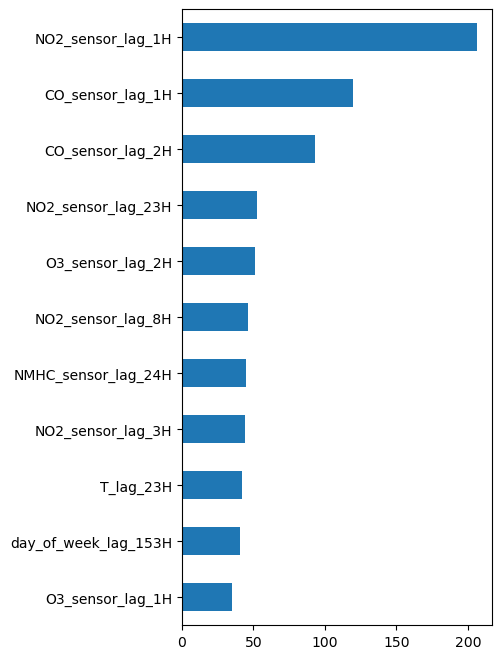

In [42]:
model=Lasso(alpha=0.1)
model.fit(X,y)
feat_importances=pd.Series(index=features,data=model.coef_)
feat_importances.abs().nlargest(11).iloc[::-1].plot(kind="barh",figsize=(4,8))

here form the graph we can see that 1H lag of no2 sensor is the most important lag followd by the Lag of co 1h and soon

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.195e+07, tolerance: 1.104e+05
  model = cd_fast.enet_coordinate_descent(


<AxesSubplot:>

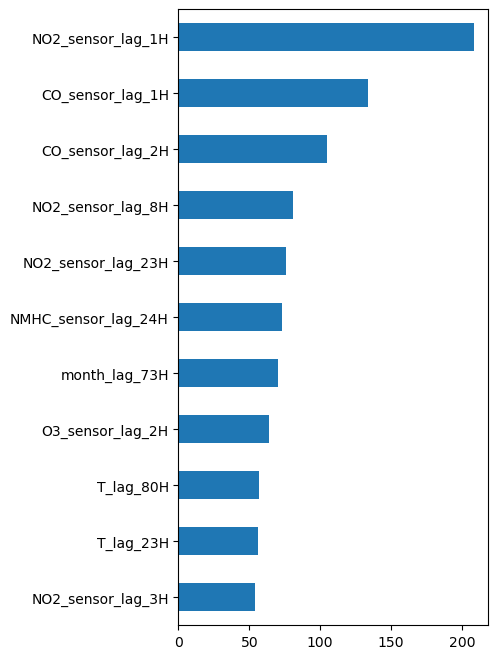

In [43]:
model=Lasso(alpha=0.01)
model.fit(X,y)
feat_importances=pd.Series(index=features,data=model.coef_)
feat_importances.abs().nlargest(11).iloc[::-1].plot(kind="barh",figsize=(4,8))

Out of 1837 features we have most important top 11 features that we can use for building a forcasting model
and evaluate using backstring